## Data Dictionary for 'cleaned_train' dataset
only include columns we have used

|Feature|Type|Description
|---|---|---|
|**flat_type**|*integer*|| 
|**floor_area_sqm**|*integer*|| 
|**flat_model**|*integer*|| 
|**lease_commence_date**|*integer*|| 
|**resale_price**|*integer*|| 
|**tranc_year**|*integer*|| 
|**tranc_month**|*integer*|| 


## EDA
The following codes are for visualisation.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import skew

#from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge, Lasso
#from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("../datasets/cleaned_train.csv")

In [4]:
# Summary statistics of numeric variables in our cleaned dataset.
df.describe()

id  floor_area_sqm  lease_commence_date  resale_price  \
count  149742.000000   149742.000000        149742.000000  1.497420e+05   
mean    92855.241362       97.222615          1992.315576  4.486662e+05   
std     53639.094344       24.441882            12.042246  1.432380e+05   
min         1.000000       31.000000          1966.000000  1.500000e+05   
25%     46233.250000       75.000000          1984.000000  3.460000e+05   
50%     92929.500000       95.000000          1990.000000  4.200000e+05   
75%    139178.750000      112.000000          2001.000000  5.200000e+05   
max    185966.000000      280.000000          2018.000000  1.258000e+06   

          tranc_year    tranc_month     mid_storey          lower  \
count  149742.000000  149742.000000  149742.000000  149742.000000   
mean     2016.466763       6.586923       8.263173       7.226523   
std         2.742201       3.339657       5.482516       5.489519   
min      2012.000000       1.000000       2.000000       1.000000   
25%      2014.000000       4.000000       5.000000       4.000000   
50%      2017.000000       7.000000       8.000000       7.000000   
75%      2019.000000       9.000000      11.000000      10.000000   
max      2021.000000      12.000000      50.000000      49.000000   

               upper            mid  floor_area_sqft  price_per_sqft  \
count  149742.000000  149742.000000    149742.000000   149742.000000   
mean        9.299822       8.263173      1046.504227      433.489815   
std         5.481949       5.482516       263.092422      104.177214   
min         3.000000       2.000000       333.684000      205.108901   
25%         6.000000       5.000000       807.300000      364.676062   
50%         9.000000       8.000000      1022.580000      411.424324   
75%        12.000000      11.000000      1205.568000      472.830940   
max        51.000000      50.000000      3013.920000     1185.640706   

             hdb_age  max_floor_lvl  year_completed  residential  \
count  149742.000000  149742.000000   149742.000000     149742.0   
mean       28.684424      15.108012     1990.788677          1.0   
std        12.042246       6.195127       12.103972          0.0   
min         3.000000       2.000000     1949.000000          1.0   
25%        20.000000      12.000000     1983.000000          1.0   
50%        31.000000      13.000000     1988.000000          1.0   
75%        37.000000      16.000000     1999.000000          1.0   
max        55.000000      50.000000     2017.000000          1.0   

          commercial  market_hawker  multistorey_carpark  precinct_pavilion  \
count  149742.000000  149742.000000        149742.000000      149742.000000   
mean        0.191890       0.000100             0.000280           0.000755   
std         0.393788       0.010008             0.016745           0.027460   
min         0.000000       0.000000             0.000000           0.000000   
25%         0.000000       0.000000             0.000000           0.000000   
50%         0.000000       0.000000             0.000000           0.000000   
75%         0.000000       0.000000             0.000000           0.000000   
max         1.000000       1.000000             1.000000           1.000000   

       total_dwelling_units    1room_sold     2room_sold     3room_sold  \
count         149742.000000  149742.00000  149742.000000  149742.000000   
mean             124.599411       0.13964       1.766358      39.293558   
std               58.317803       5.96565      11.688068      68.868183   
min                2.000000       0.00000       0.000000       0.000000   
25%               90.000000       0.00000       0.000000       0.000000   
50%              112.000000       0.00000       0.000000       0.000000   
75%              144.000000       0.00000       0.000000      66.000000   
max              570.000000     255.00000     225.000000     528.000000   

          4room_sold     5room_sold      exec_sold  multigen_sold  \
c

In [5]:
postal_count = df.groupby("postal_sector").count().reset_index()
postal_count

postal_sector     id  tranc_yearmonth   town  flat_type  block  \
0               5    174              174    174        174    174   
1               8    878              878    878        878    878   
2               9    988              988    988        988    988   
3              10   1069             1069   1069       1069   1069   
4              12   3628             3628   3628       3628   3628   
5              13    464              464    464        464    464   
6              14   2372             2372   2372       2372   2372   
7              15   1189             1189   1189       1189   1189   
8              16   2295             2295   2295       2295   2295   
9              18    186              186    186        186    186   
10             19    189              189    189        189    189   
11             20    298              298    298        298    298   
12             21    582              582    582        582    582   
13             26    131              131    131        131    131   
14             27   1226             1226   1226       1226   1226   
15             30     10               10     10         10     10   
16             31   4079             4079   4079       4079   4079   
17             32   1735             1735   1735       1735   1735   
18             33   1200             1200   1200       1200   1200   
19             35    523              523    523        523    523   
20             36    233              233    233        233    233   
21             37   1192             1192   1192       1192   1192   
22             38   1164             1164   1164       1164   1164   
23             39    474              474    474        474    474   
24             40   1272             1272   1272       1272   1272   
25             41    487              487    487        487    487   
26             42     21               21     21         21     21   
27             43    344              344    344        344    344   
28             44    959              959    959        959    959   
29             46   6296             6296   6296       6296   6296   
30             47   2240             2240   2240       2240   2240   
31             50     38               38     38         38     38   
32             51   4708             4708   4708       4708   4708   
33             52  10463            10463  10463      10463  10463   
34             53   7688             7688   7688       7688   7688   
35             54   8315             8315   8315       8315   8315   
36             55   2972             2972   2972       2972   2972   
37             56   6907             6907   6907       6907   6907   
38             57   2870             2870   2870       2870   2870   
39             59    238              238    238        238    238   
40             60   3431             3431   3431       3431   3431   
41             61   1224             1224   1224       1224   1224   
42             64  10214            10214  10214      10214  10214   
43             65   5623             5623   5623       5623   5623   
44             66     77               77     77         77     77   
45             67   5664             5664   5664       5664   5664   
46             68   6205             6205   6205       6205   6205   
47             73  11281            11281  11281      11281  11281   
48             75   3723             3723   3723       3723   3723   
49             76  10037            10037  10037      10037  10037   
50             79   2552             2552   2552       2552   2552   
51             82   7614             7614   7614       7614   7614   

    street_name  storey_range  floor_area_sqm  flat_model  \
0           174           174             174         174   
1           878           878             878         878   
2           988           988             988         988   
3          1069          1069            1069    

In [ ]:
(                                 "Raffles Place", 5
                                  "Tanjong Pagar", 8
                                  "Queenstown", 14
                                  "Harbourfront", 10
                                  "Pasir Panjang", 12
                                  "Golden Mile", 19
                                  "Little India", 21
                                  "Bukit Timah", 27
                                  "Novena", 30
                                  "Toa Payoh", 31
                                  "Macpherson", 37
                                  "Geylang", 40
                                  "Katong", 44
                                  "Bedok", 46
                                  "Loyang", 50
                                  "Tampines",52
                                  "Hougang", 82
                                  "Bishan", 56
                                  "Clementi Park", 59
                                  "Jurong", 64
                                  "Bukit Panjang", 68
                                  "Kranji", 73
                                  "Upper Thomson", 77
                                  "Yishun", 76
                                  "Seletar", 79))

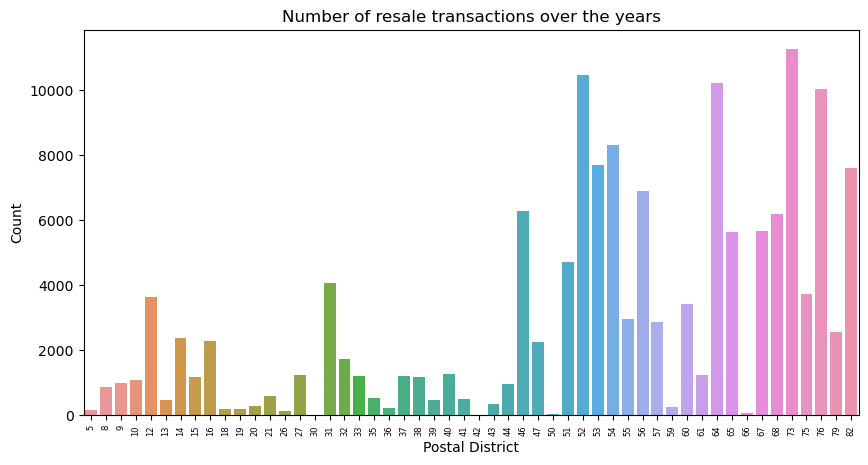

In [55]:
# Visualize the number of resale transactions over the years
# Set the figure size
plt.figure(figsize=(10, 5))  

# Create the line plot
postal_count = df.groupby("postal_sector").count().reset_index()
sns.barplot(data=postal_count, x="postal_sector", y="tranc_yearmonth")


# Add labels and titles
plt.xlabel("Postal District")
plt.ylabel("Count")
plt.title("Number of resale transactions over the years")

# Set the x-axis font size
plt.xticks(fontsize=6, rotation=90)


# Show the plot
plt.show()

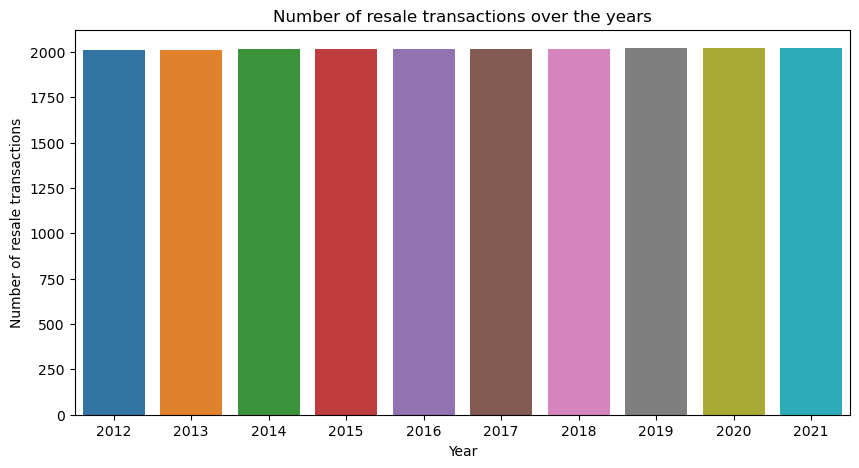

In [46]:
# Visualize the number of resale transactions over the years
# Set the figure size
plt.figure(figsize=(10, 5))  

# Create the line plot
transact_count = df.groupby("tranc_year").count().reset_index()
sns.barplot(data=transact_count, x="tranc_year", y="tranc_year")


# Add labels and titles
plt.xlabel("Year")
plt.ylabel("Number of resale transactions")
plt.title("Number of resale transactions over the years")

# Set the x-axis font size
#plt.xticks(fontsize=7, rotation=90)


# Show the plot
plt.show()

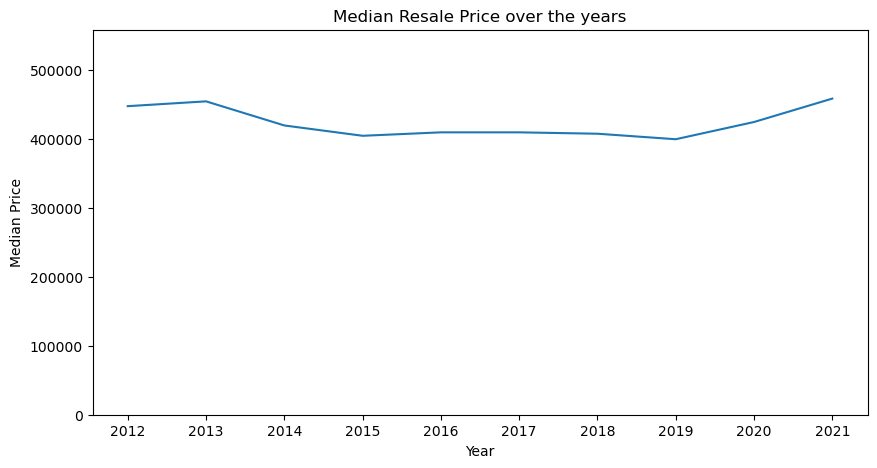

In [42]:
# Visualize the median resale price over the years
# Set the figure size
plt.figure(figsize=(10, 5))  

# Create the line plot
resale_median = df.groupby('tranc_year')['resale_price'].median().reset_index()
sns.lineplot(data=resale_median, x='tranc_year', y="resale_price", errorbar=None)

# Set y-axis limits to start at 0
max_y_value = resale_median['resale_price'].max() + 100000
plt.ylim(0, max_y_value)

# Add labels and titles
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.title('Median Resale Price over the years')

# Show all x-axis labels without rotation
plt.xticks(resale_median['tranc_year'], rotation=0)

# Show the plot
plt.show()

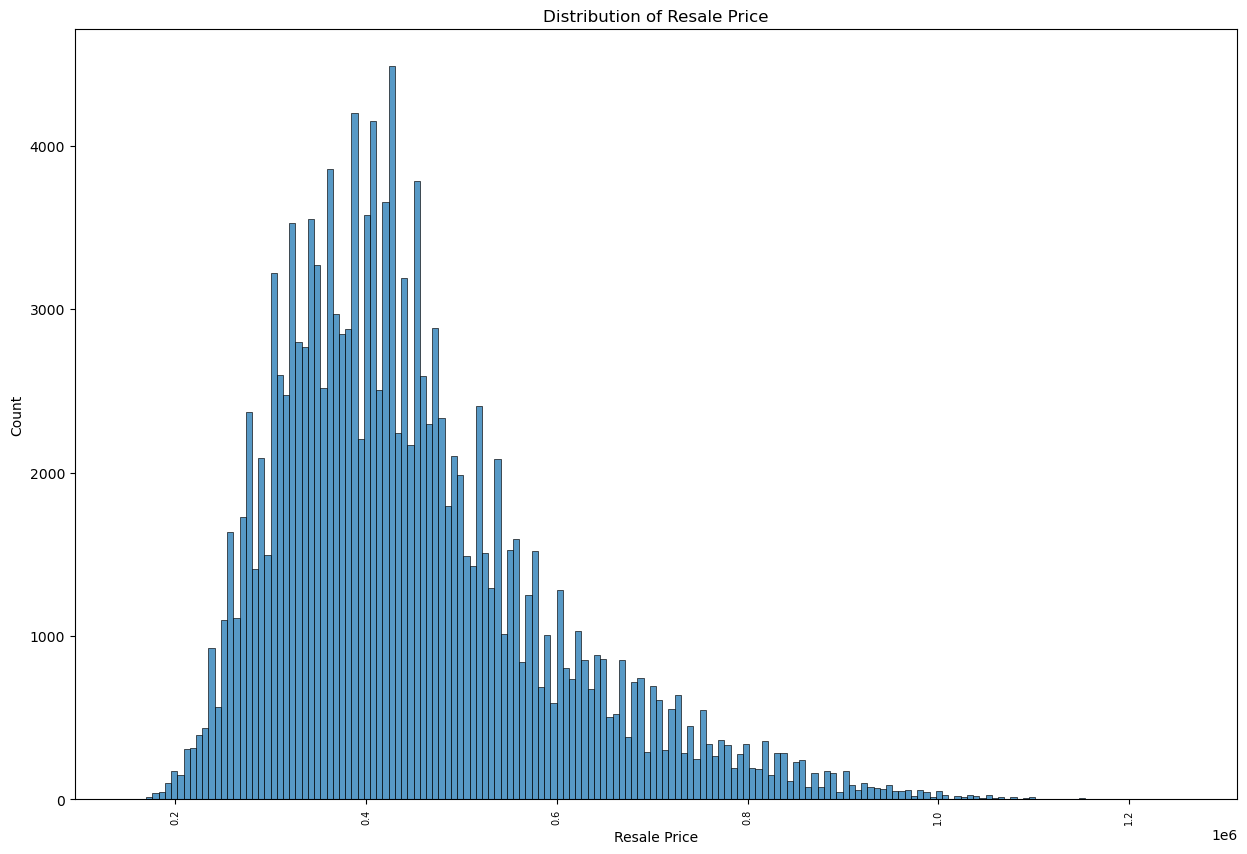

In [9]:
# Distribution of resale price

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.histplot(data=df,x="resale_price")

# Add labels and titles
plt.xlabel('Resale Price')
plt.ylabel('Count')
plt.title("Distribution of Resale Price")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

The distribution of resale price is fairly normally distributed. Although there is some degree of right-skewness, with the large sample size of 149742, we can still apply linear regression to model the relationship between our response variable and the features. 

[Text(0.5, 1.0, 'Distribution of resale price')]

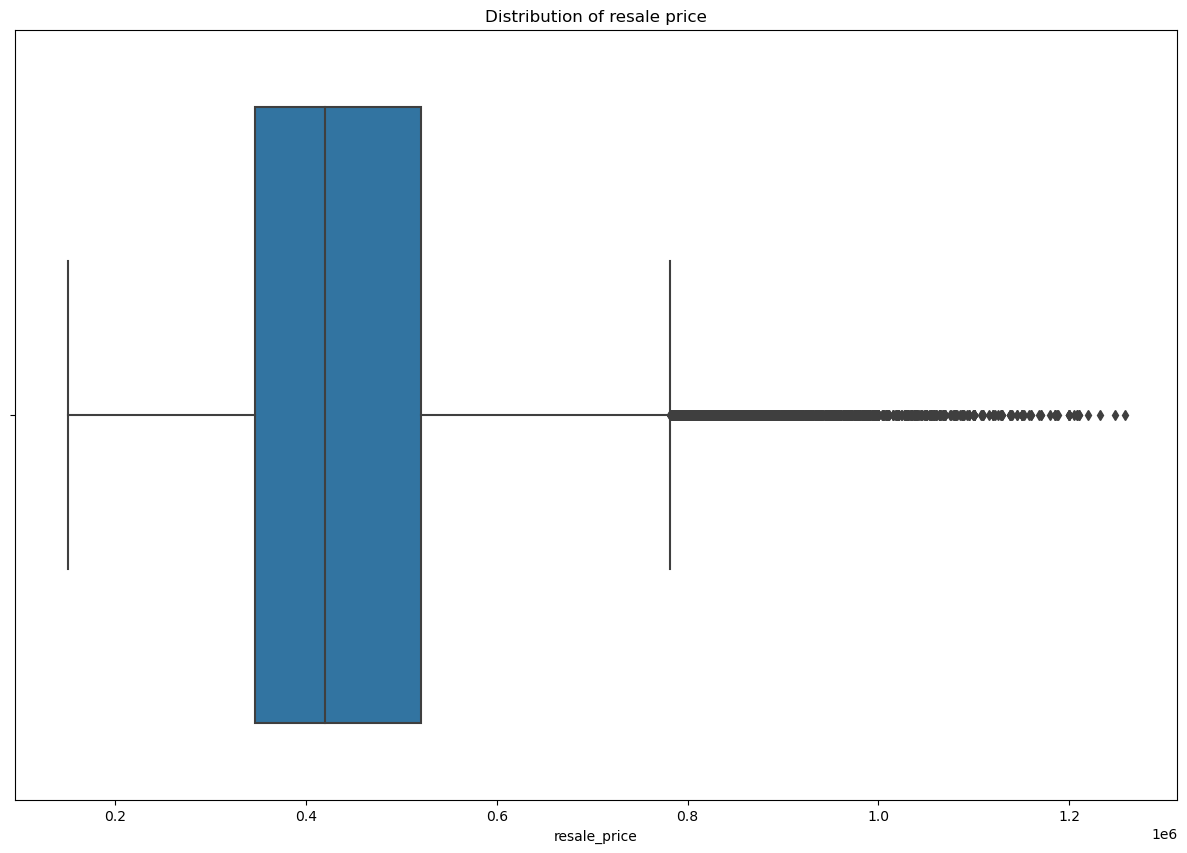

In [93]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="resale_price").set(title="Distribution of resale price")

# There is presence of outliers for our response variable. 

Based on our domain knowledge and research, there are 5 key areas that may affect resale price:
1) House characteristics
2) Geospatial
3) Nearby amenities
4) Accessibility (transport)
5) Nearby primary schools

As such, to streamline the analysis process, we conducted EDA for each of these areas, where each area consists of their respective features from the dataframe which we are interested to further explore.



### 1. House characteristics
- flat_model
- flat_type
- hdb_age
- floor_area_sqm
- floor_area_sqft
- lease_commence_date
- year_completed
- mid_storey
- tranc_year

Text(0, 0.5, 'Flat model')

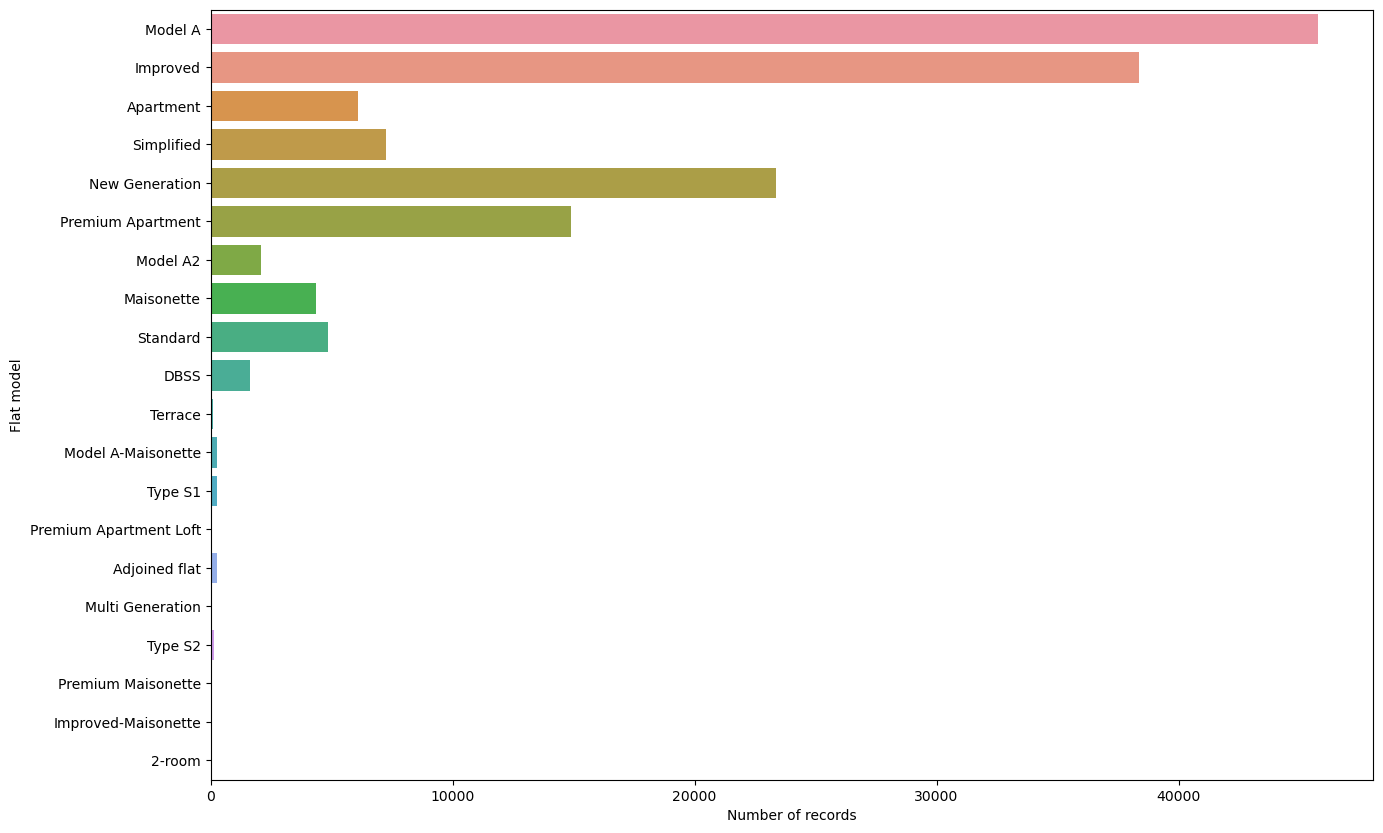

In [84]:
plt.figure(figsize=(15,10))

plot = sns.countplot(y="flat_model", data=df)
plot.set_xlabel('Number of records')
plot.set_ylabel('Flat model')

In [89]:
df.groupby("flat_model")[["flat_model"]].count()

flat_model
flat_model                        
2-room                           4
Adjoined flat                  260
Apartment                     6079
DBSS                          1639
Improved                     38364
Improved-Maisonette             19
Maisonette                    4362
Model A                      45753
Model A-Maisonette             262
Model A2                      2064
Multi Generation                56
New Generation               23366
Premium Apartment            14887
Premium Apartment Loft          50
Premium Maisonette              15
Simplified                    7238
Standard                      4860
Terrace                         95
Type S1                        242
Type S2                        127

Text(0, 0.5, 'Flat type')

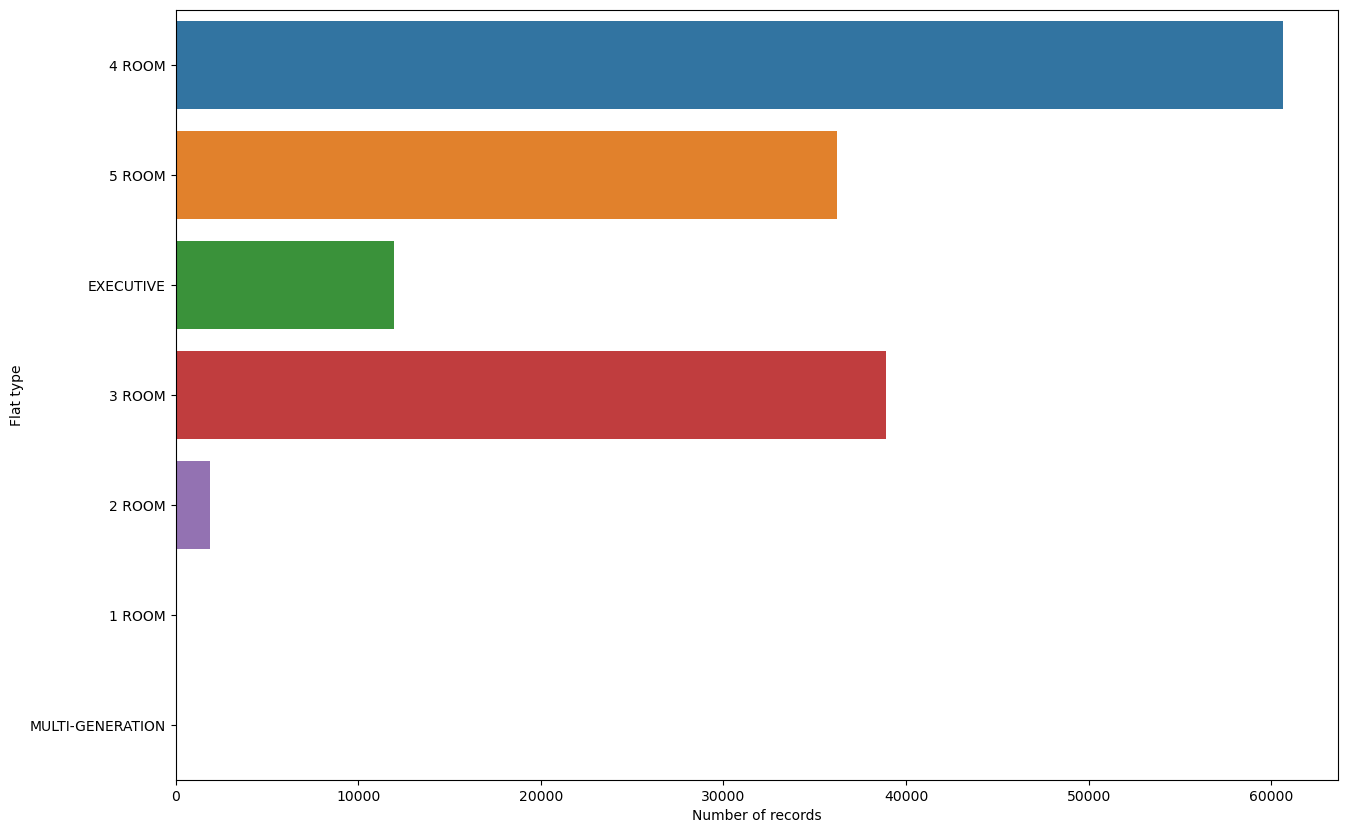

In [94]:
plt.figure(figsize=(15,10))

plot = sns.countplot(y="flat_type", data=df)
plot.set_xlabel('Number of records')
plot.set_ylabel('Flat type')

[Text(0.5, 1.0, 'Relationship between resale price and age of HDB flat')]

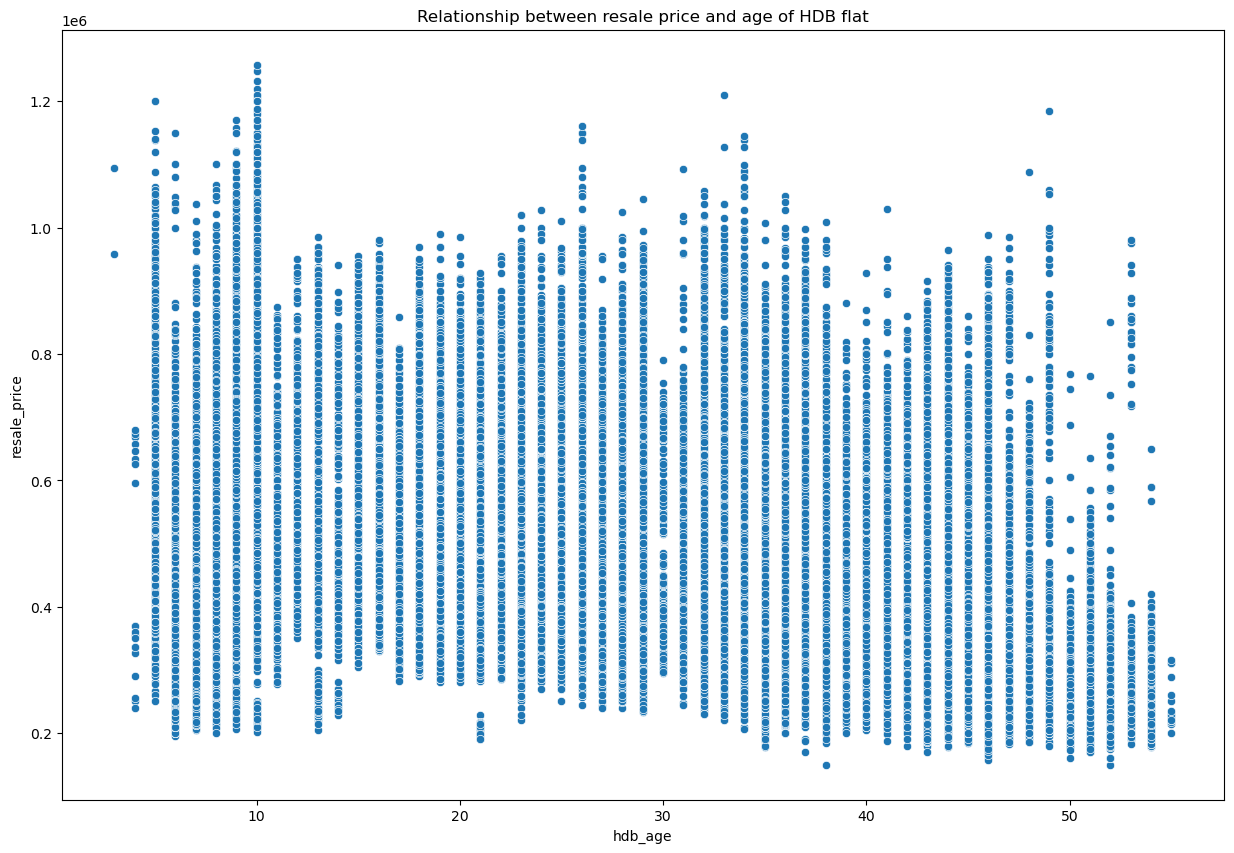

In [105]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="hdb_age", y="resale_price").set(title="Relationship between resale price and age of HDB flat")


[Text(0.5, 1.0, 'Relationhip between resale price and floor area (in sqm)')]

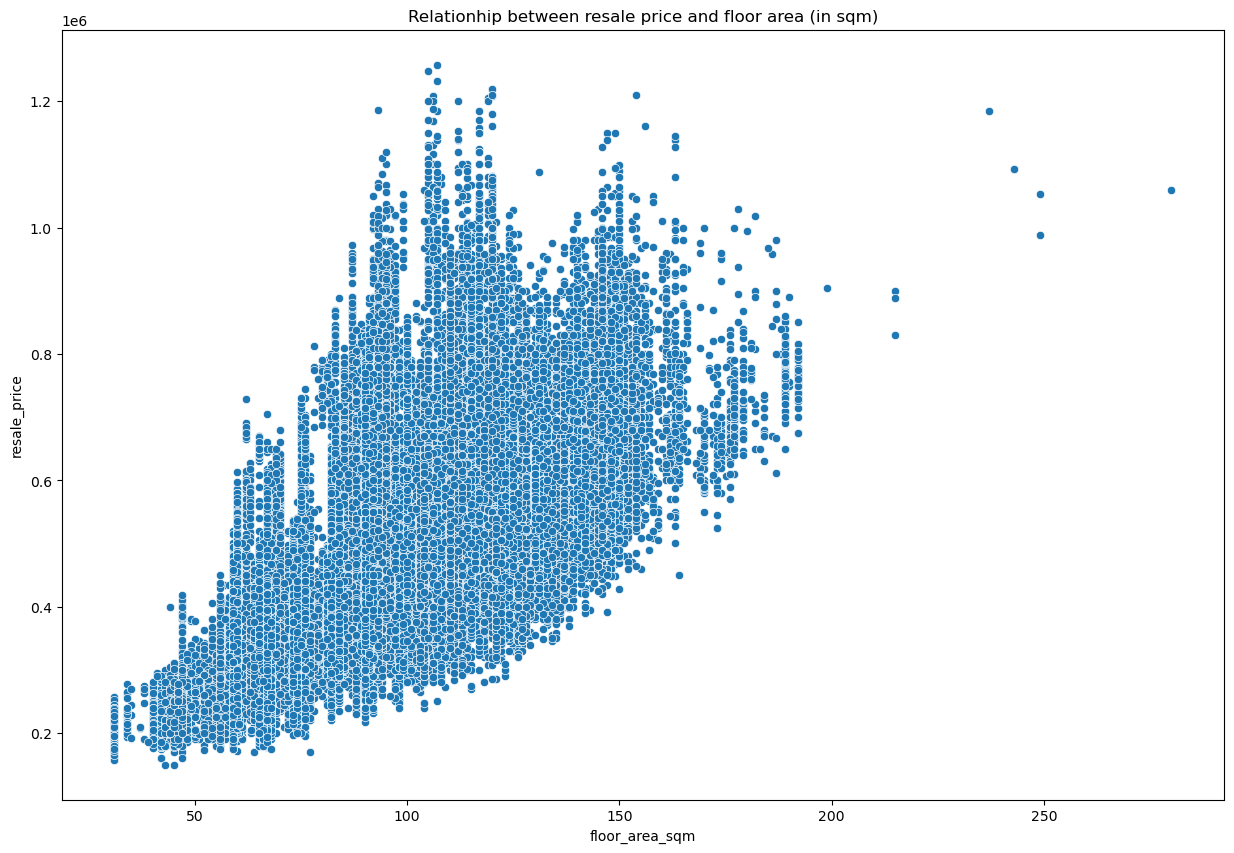

In [106]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_final,x="floor_area_sqm",y="resale_price").set(title="Relationhip between resale price and floor area (in sqm)")

[Text(0.5, 1.0, 'Trend line of resale prices by the transacted years for the various flat types')]

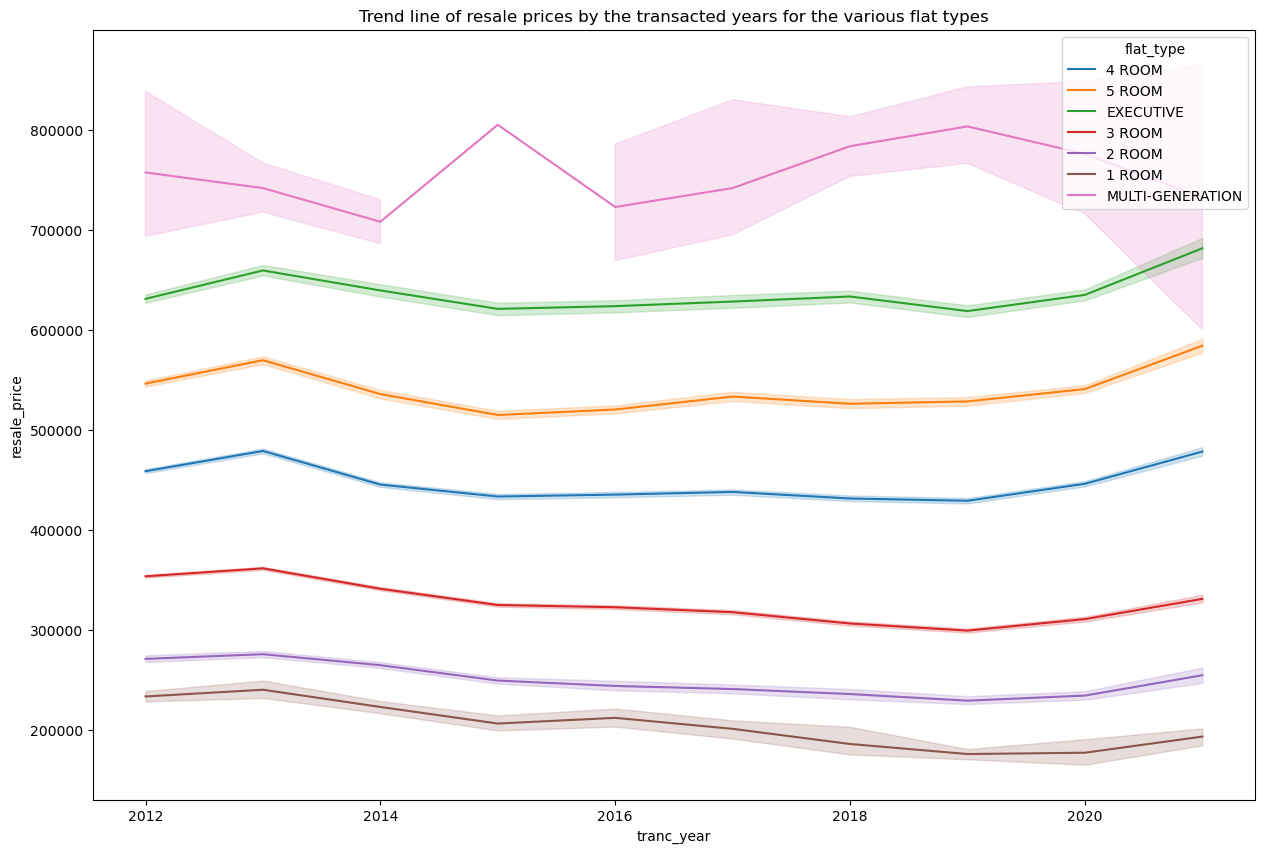

In [23]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_final,x="tranc_year",y="resale_price",hue="flat_type").set(title="Trend line of resale prices by the transacted year for the various flat types")

[Text(0.5, 1.0, 'Trend line of resale prices by the transacted year for the various flat models')]

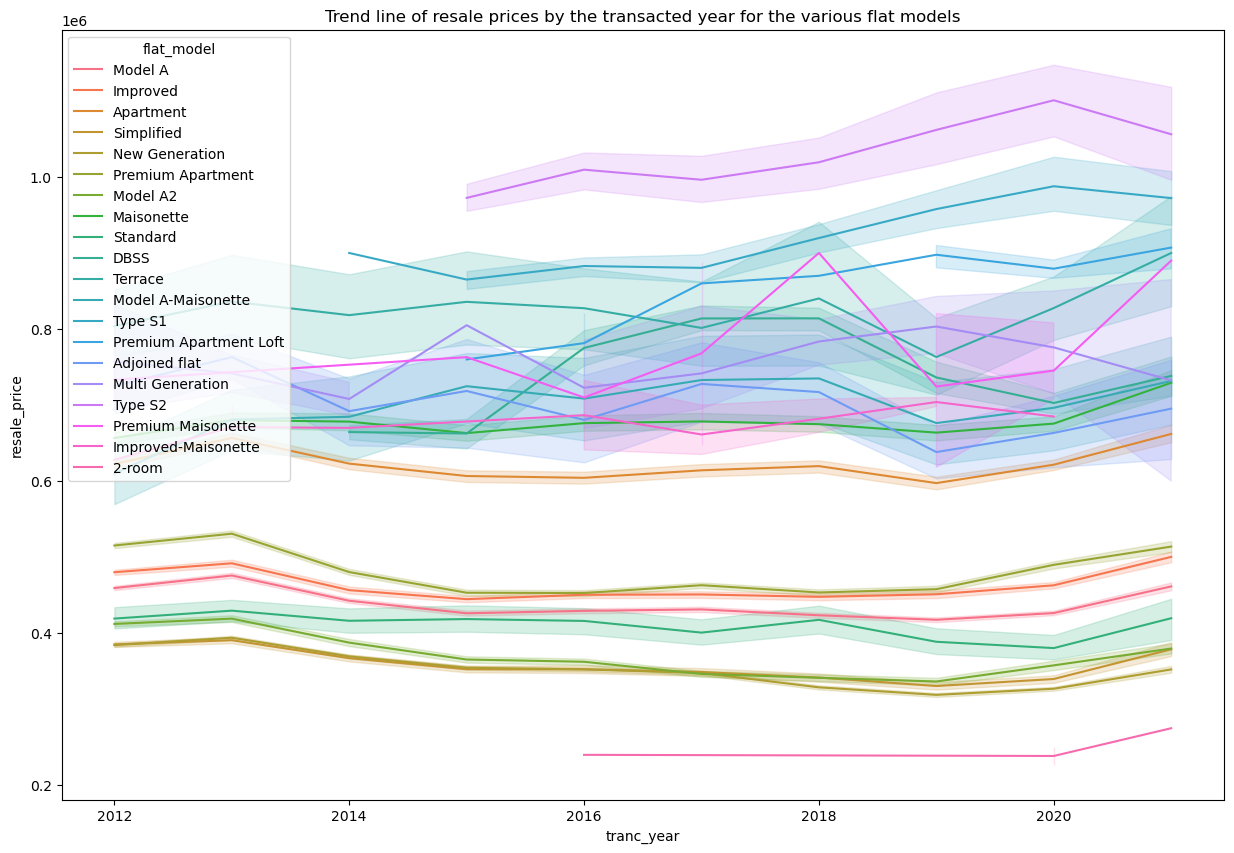

In [107]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_final,x="tranc_year",y="resale_price",hue="flat_model").set(title="Trend line of resale prices by the transacted year for the various flat models")

[Text(0.5, 1.0, 'Trend line of resale prices based on lease commence date for the various flat types')]

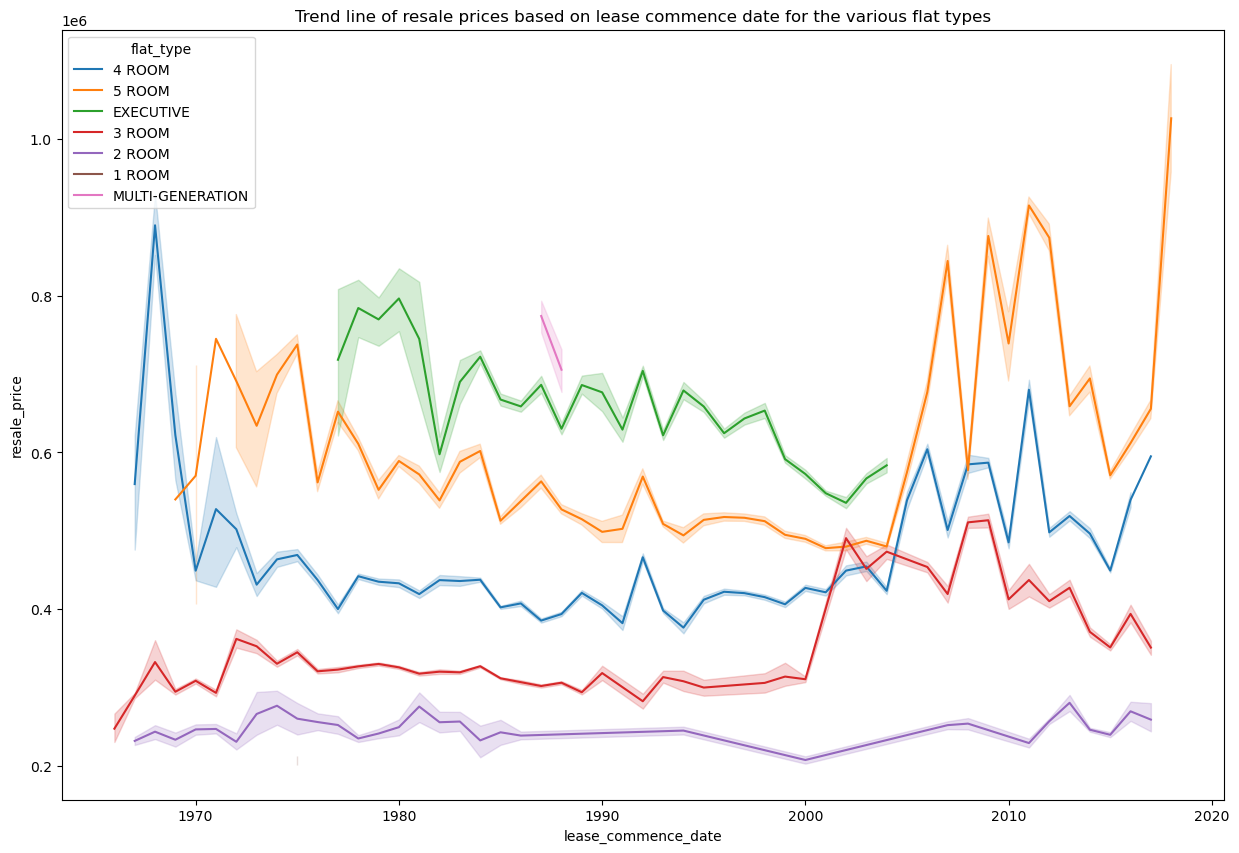

In [24]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_final,x="lease_commence_date",y="resale_price",hue="flat_type").set(title="Trend line of resale prices based on lease commence date for the various flat types")

<Figure size 3000x2000 with 0 Axes>

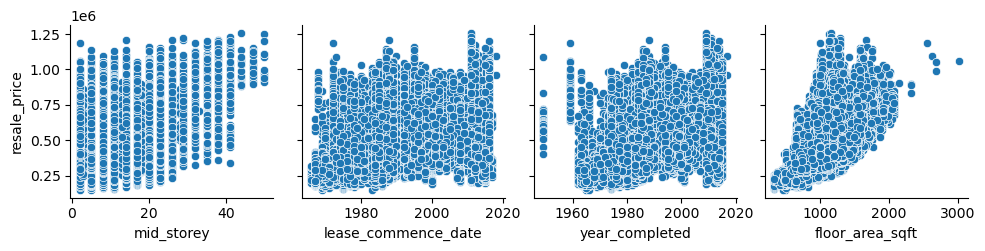

In [122]:
plt.figure(figsize=(30,20))
sns.pairplot(df,
    x_vars=["mid_storey", "lease_commence_date", "year_completed","floor_area_sqft"],
    y_vars=["resale_price"])

In [120]:
df_house_info = df[["resale_price","mid","lease_commence_date","year_completed","flat_model","floor_area_sqft","floor_area_sqm","flat_type"]]

df_house_info.corr()

/var/folders/ln/s46v4gtx1nx56rygx6_xcmkw0000gn/T/ipykernel_11262/2876177528.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_house_info.corr()


resale_price       mid  lease_commence_date  \
resale_price             1.000000  0.351821             0.348430   
mid                      0.351821  1.000000             0.262267   
lease_commence_date      0.348430  0.262267             1.000000   
year_completed           0.351802  0.265506             0.988676   
floor_area_sqft          0.656835  0.026170             0.289145   
floor_area_sqm           0.656835  0.026170             0.289145   

                     year_completed  floor_area_sqft  floor_area_sqm  
resale_price               0.351802         0.656835        0.656835  
mid                        0.265506         0.026170        0.026170  
lease_commence_date        0.988676         0.289145        0.289145  
year_completed             1.000000         0.294763        0.294763  
floor_area_sqft            0.294763         1.000000        1.000000  
floor_area_sqm             0.294763         1.000000        1.000000

### 2. Geospatial
- town
- latitude
- longitude
- postal
- postal sector
- street_name
- full_flat_type


[Text(0.5, 1.0, 'Distribution of resale price by towns')]

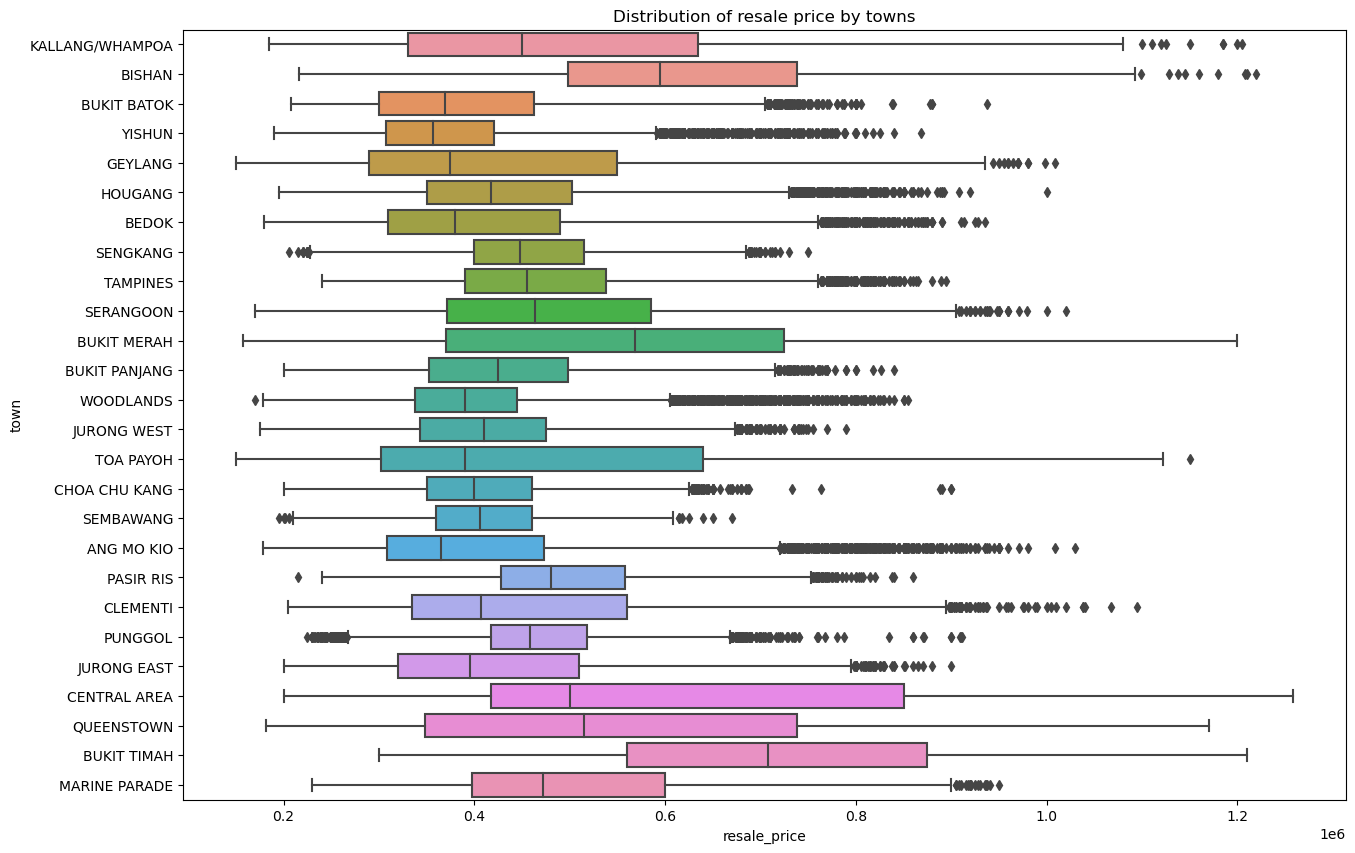

In [109]:
# Plotting the town against the resale price to see if there are differences in the distributions.
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="resale_price",y="town").set(title="Distribution of resale price by towns")

#plt.ylabel("Town")
#plt.xlabel("Resale Price")
# Based on the boxplots, there seem to be differences in the median resale prices. We can consider grouping the towns based on its regions.

<Figure size 3000x2000 with 0 Axes>

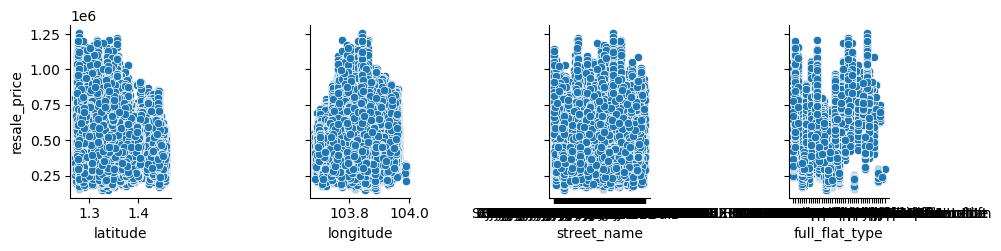

In [117]:
plt.figure(figsize=(30,20))
sns.pairplot(df,
    x_vars=["latitude", "longitude", "street_name", "full_flat_type"],
    y_vars=["resale_price"])

In [121]:
df_house_info = df[["resale_price","latitude","longitude","postal","street_name","full_flat_type","town","planning_area"]]

df_house_info.corr()

/var/folders/ln/s46v4gtx1nx56rygx6_xcmkw0000gn/T/ipykernel_11262/1707433838.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_house_info.corr()


resale_price  latitude  longitude    postal
resale_price      1.000000 -0.215708   0.105987 -0.229577
latitude         -0.215708  1.000000  -0.025584  0.831573
longitude         0.105987 -0.025584   1.000000 -0.136429
postal           -0.229577  0.831573  -0.136429  1.000000

### 3. Nearby amenities (mall, hawker)

Shopping malls in Singapore are a one-stop destination for everything (shopping, food, groceries, services).

Distances to the nearest mall from the flats range between 0.00km to 3.21km, with a mean of 0.66km

for the further away you are from certain amenities, the less valuable the flat)

In [39]:
df_ameni = df[['resale_price','mall_nearest_distance','mall_within_500m','mall_within_1km','mall_within_2km','hawker_nearest_distance','hawker_within_500m','hawker_within_1km','hawker_within_2km']]

In [55]:
df_ameni.describe()

resale_price  mall_nearest_distance  mall_within_500m  mall_within_1km  \
count  1.497420e+05          149742.000000     149742.000000    149742.000000   
mean   4.486662e+05             664.426314          0.489883         1.796223   
std    1.432380e+05             368.678327          0.729694         1.421096   
min    1.500000e+05              34.265581          0.000000         0.000000   
25%    3.460000e+05             391.517661          0.000000         1.000000   
50%    4.200000e+05             603.204679          0.000000         2.000000   
75%    5.200000e+05             868.818288          1.000000         3.000000   
max    1.258000e+06            3496.402910          6.000000        15.000000   

       mall_within_2km  hawker_nearest_distance  hawker_within_500m  \
count    149742.000000            149742.000000       149742.000000   
mean          5.197186              1167.571392            0.490397   
std           3.470181              1071.120967            0.767238   
min           0.000000                 1.873295            0.000000   
25%           3.000000               371.535049            0.000000   
50%           5.000000               776.103172            0.000000   
75%           6.000000              1669.780674            1.000000   
max          43.000000              4816.062542            5.000000   

       hawker_within_1km  hawker_within_2km  postal_sector  \
count      149742.000000      149742.000000  149742.000000   
mean            1.409912           3.802580      55.252407   
std             1.711613           4.009482      18.732979   
min             0.000000           0.000000       5.000000   
25%             0.000000           1.000000      47.000000   
50%             1.000000           2.000000      56.000000   
75%             2.000000           7.000000      68.000000   
max             9.000000          19.000000      82.000000   

       hawker_nearest_dist_log  
count            149742.000000  
mean                  6.633113  
std                   0.976944  
min                   0.627699  
25%                   5.917643  
50%                   6.654285  
75%                   7.420448  
max                   8.479712

In [40]:
df_ameni.corr()

resale_price  mall_nearest_distance  \
resale_price                 1.000000              -0.087196   
mall_nearest_distance       -0.087196               1.000000   
mall_within_500m             0.087923              -0.627841   
mall_within_1km              0.083874              -0.582782   
mall_within_2km              0.114968              -0.182640   
hawker_nearest_distance     -0.016082              -0.213868   
hawker_within_500m           0.013042               0.106729   
hawker_within_1km            0.090734               0.103437   
hawker_within_2km            0.182951               0.202112   

                         mall_within_500m  mall_within_1km  mall_within_2km  \
resale_price                     0.087923         0.083874         0.114968   
mall_nearest_distance           -0.627841        -0.582782        -0.182640   
mall_within_500m                 1.000000         0.513023         0.212072   
mall_within_1km                  0.513023         1.000000         0.436206   
mall_within_2km                  0.212072         0.436206         1.000000   
hawker_nearest_distance          0.069285         0.021674        -0.057599   
hawker_within_500m               0.024208         0.003650         0.187753   
hawker_within_1km                0.003067         0.038007         0.180706   
hawker_within_2km               -0.088106        -0.072629         0.238130   

                         hawker_nearest_distance  hawker_within_500m  \
resale_price                           -0.016082            0.013042   
mall_nearest_distance                  -0.213868            0.106729   
mall_within_500m                        0.069285            0.024208   
mall_within_1km                         0.021674            0.003650   
mall_within_2km                        -0.057599            0.187753   
hawker_nearest_distance                 1.000000           -0.529416   
hawker_within_500m                     -0.529416            1.000000   
hawker_within_1km                      -0.605359            0.756725   
hawker_within_2km                      -0.595866            0.639922   

                         hawker_within_1km  hawker_within_2km  
resale_price                      0.090734           0.182951  
mall_nearest_distance             0.103437           0.202112  
mall_within_500m                  0.003067          -0.088106  
mall_within_1km                   0.038007          -0.072629  
mall_within_2km                   0.180706           0.238130  
hawker_nearest_distance          -0.605359          -0.595866  
hawker_within_500m                0.756725           0.639922  
hawker_within_1km                 1.000000           0.830104  
hawker_within_2km                 0.830104           1.000000

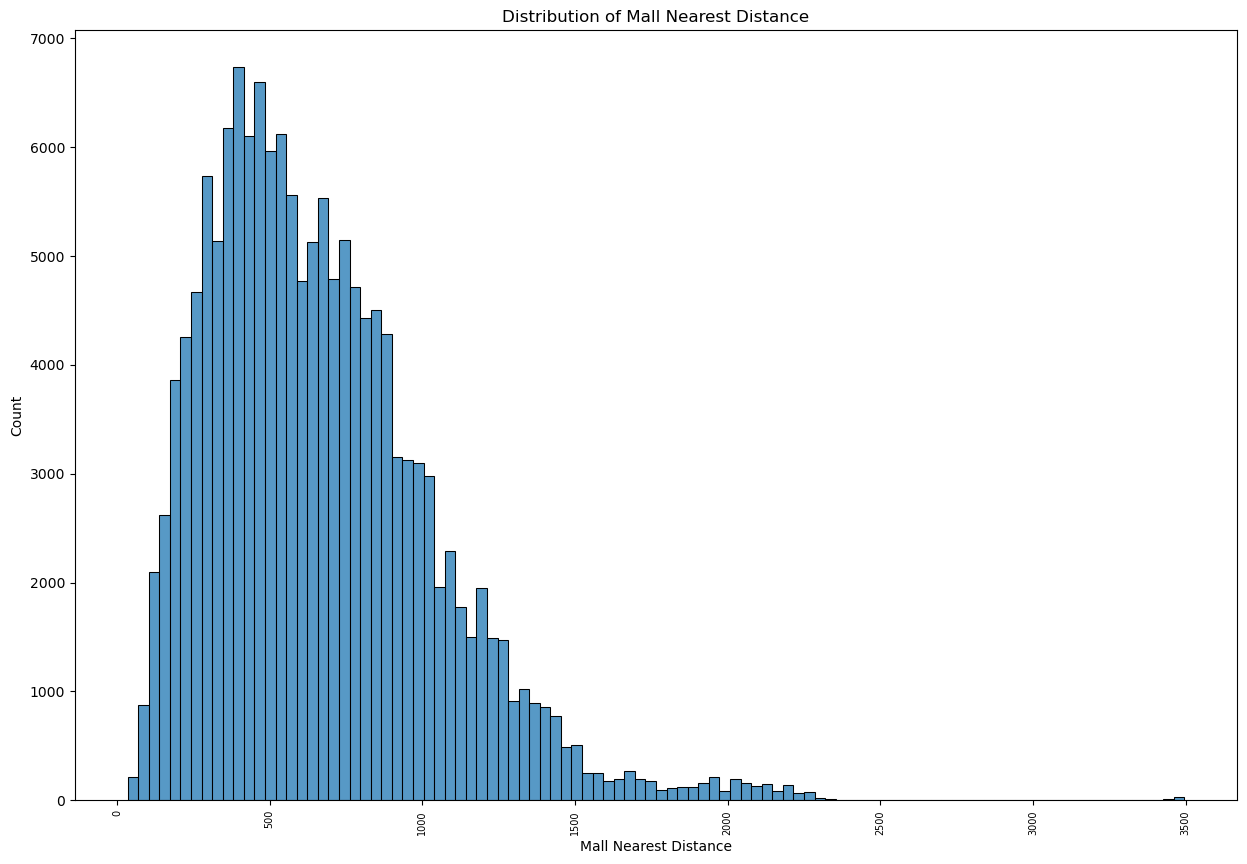

In [41]:
# Distribution of Mall Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.histplot(data=df_ameni,x="mall_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('Mall Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of Mall Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

In [52]:
skew(df_ameni['mall_nearest_distance'])

1.116942513266651

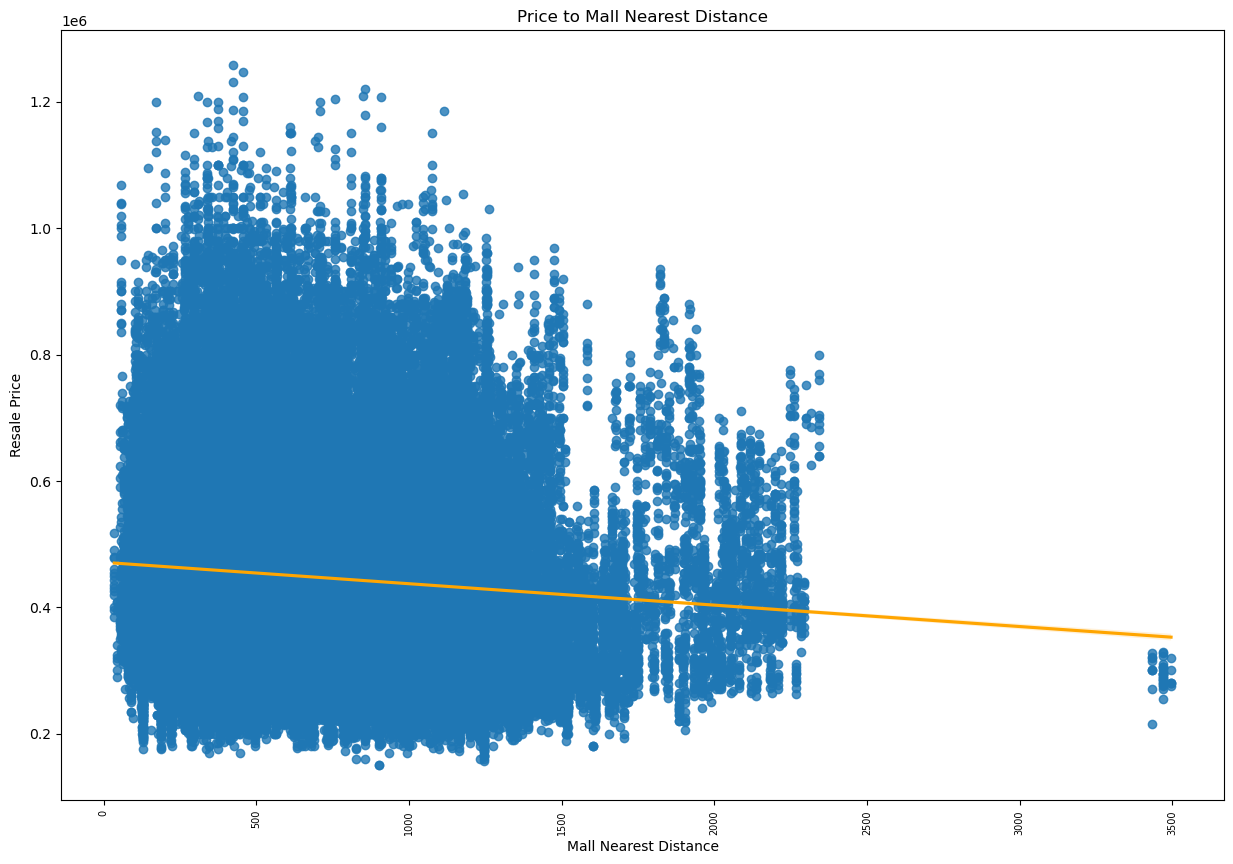

In [42]:
# Re of Mall Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.regplot(data=df_ameni,x="mall_nearest_distance", y="resale_price", line_kws = {'color': 'orange'})

# Add labels and titles
plt.xlabel('Mall Nearest Distance')
plt.ylabel('Resale Price')
plt.title("Price to Mall Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

In [43]:
# Locate the postal sector for mall nearest distance >3000m

df_ameni["postal_sector"] = df["postal_sector"]
df_ameni[df_ameni['mall_nearest_distance'] >3000]

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_20173/3498487487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ameni["postal_sector"] = df["postal_sector"]


resale_price  mall_nearest_distance  mall_within_500m  \
8534        280000.0            3471.145638               0.0   
12093       305000.0            3471.145638               0.0   
13316       320000.0            3435.307130               0.0   
30358       330000.0            3471.145638               0.0   
31528       310000.0            3471.145638               0.0   
32355       280000.0            3471.145638               0.0   
37007       285000.0            3471.145638               0.0   
38241       300000.0            3435.307130               0.0   
38984       280000.0            3496.402910               0.0   
50196       300000.0            3471.145638               0.0   
52023       285000.0            3471.145638               0.0   
54519       295000.0            3471.145638               0.0   
59135       286000.0            3471.145638               0.0   
63342       270000.0            3435.307130               0.0   
67276       295000.0            3471.145638               0.0   
67830       315000.0            3435.307130               0.0   
68098       275000.0            3496.402910               0.0   
72045       328000.0            3435.307130               0.0   
75565       321500.0            3435.307130               0.0   
78887       300000.0            3435.307130               0.0   
79767       301000.0            3496.402910               0.0   
79992       305000.0            3471.145638               0.0   
80731       295000.0            3471.145638               0.0   
82775       305500.0            3471.145638               0.0   
94763       323000.0            3471.145638               0.0   
96336       277000.0            3471.145638               0.0   
96390       280000.0            3496.402910               0.0   
102257      280000.0            3496.402910               0.0   
113027      275000.0            3471.145638               0.0   
114255      255000.0            3471.145638               0.0   
114580      300000.0            3435.307130               0.0   
120918      290000.0            3471.145638               0.0   
127615      290000.0            3471.145638               0.0   
129945      327000.0            3471.145638               0.0   
130521      295000.0            3471.145638               0.0   
130847      270800.0            3471.145638               0.0   
144395      215000.0            3435.307130               0.0   
146639      320000.0            3496.402910               0.0   

        mall_within_1km  mall_within_2km  hawker_nearest_distance  \
8534                0.0              0.0               176.890682   
12093               0.0              0.0               176.890682   
13316               0.0              0.0               136.383625   
30358               0.0              0.0               176.890682   
31528               0.0              0.0               176.890682   
32355               0.0              0.0               176.890682   
37007               0.0              0.0               176.890682   
38241               0.0              0.0               136.383625   
38984               0.0              0.0               105.653140   
50196               0.0              0.0               176.890682   
52023               0.0              0.0               176.890682   
54519               0.0              0.0               176.890682   
59135               0.0              0.0               176.890682   
63342               0.0              0.0               136.383625   
67276               0.0              0.0               176.890682   
67830               0.0              0.0               136.383625   
68098               0.0              0.0               105.653140   
72045               0.0              0.0               136.383625   
75565               0.0              0.0               136.383625   
78887               0.0              0.0               136.383625   
79767               0.0

Mall nearest distance follows a fairly normal distribution, slightly positively skewed. 

Generally, flats with presence of nearby malls cost more, and the price decreases as the distance between the flat and mall increases. 

Mall nearest distance > 3000m are all located in postal sector = 50, which is in Changi. This indicates that flats in Changi area has no nearby malls. If buyers prioritise having nearby malls around their house, they should avoid the Changi area.


## check, for every distance increase, median price increase by?

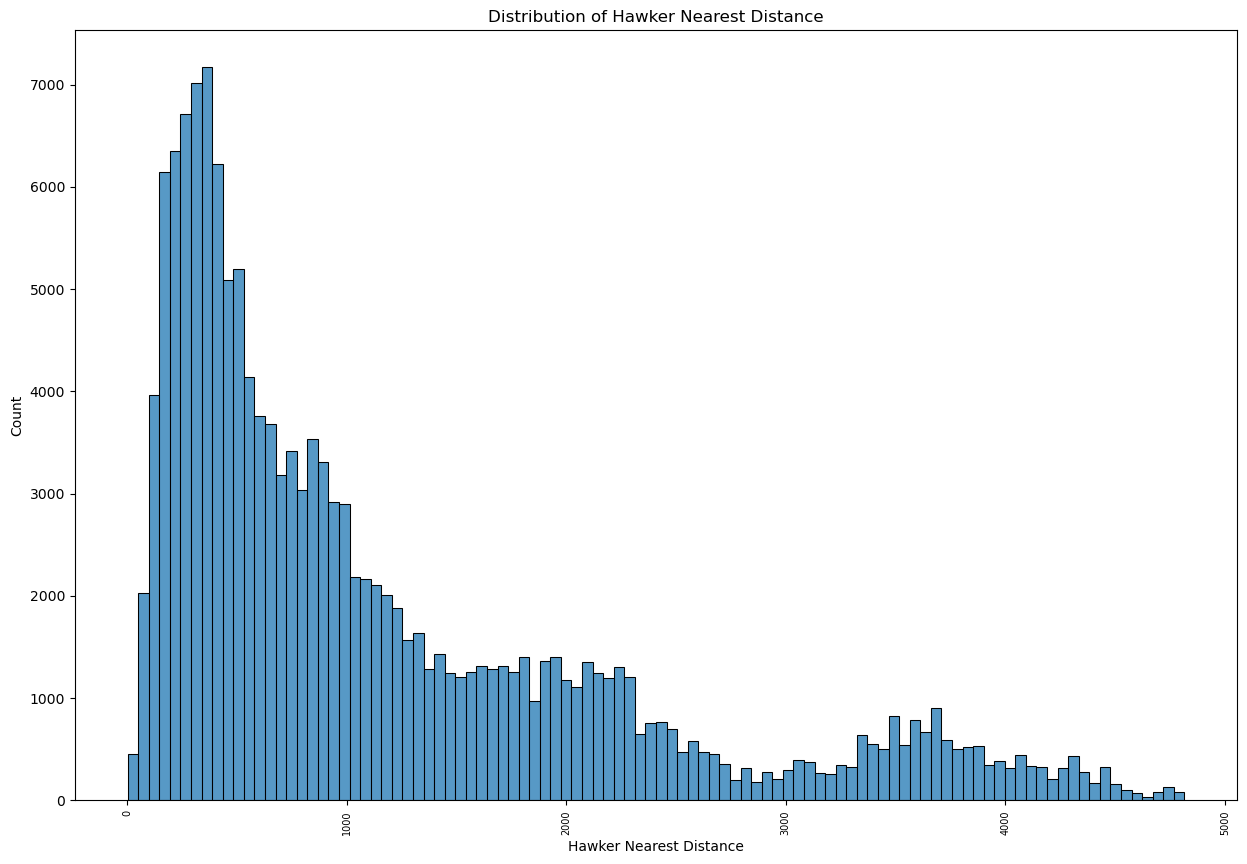

In [44]:
# Distribution of Hawker Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.histplot(data=df_ameni,x="hawker_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('Hawker Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of Hawker Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

In [53]:
skew(df_ameni['hawker_nearest_distance'])

1.3594952313552866

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_20173/2358027601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ameni["hawker_nearest_dist_log"] = np.log(df_ameni["hawker_nearest_distance"])


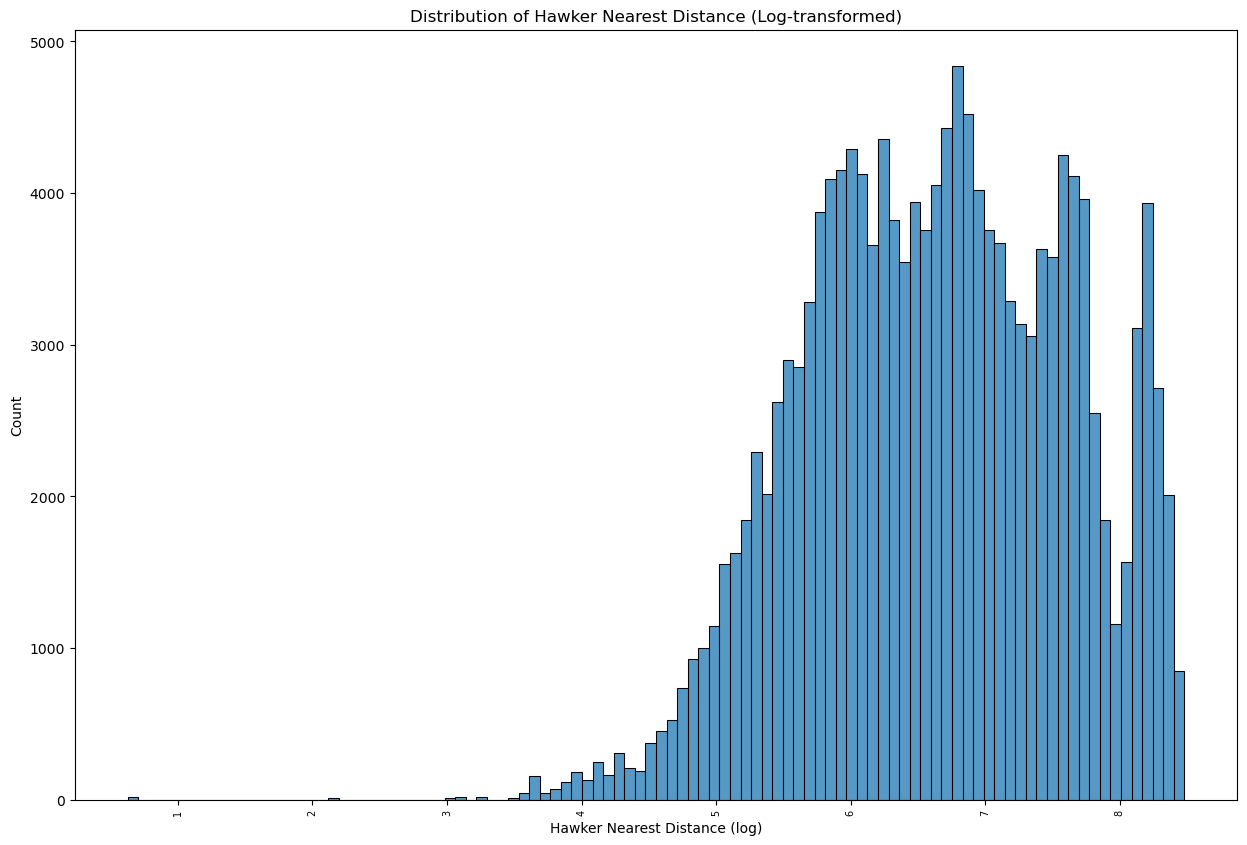

In [47]:
# Distribution of Hawker Nearest Distance (Log-transformed)

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
df_ameni["hawker_nearest_dist_log"] = np.log(df_ameni["hawker_nearest_distance"])
sns.histplot(data=df_ameni,x="hawker_nearest_dist_log", bins=100)

# Add labels and titles
plt.xlabel('Hawker Nearest Distance (log)')
plt.ylabel('Count')
plt.title("Distribution of Hawker Nearest Distance (Log-transformed)")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

In [48]:
df_ameni.corr()

resale_price  mall_nearest_distance  \
resale_price                 1.000000              -0.087196   
mall_nearest_distance       -0.087196               1.000000   
mall_within_500m             0.087923              -0.627841   
mall_within_1km              0.083874              -0.582782   
mall_within_2km              0.114968              -0.182640   
hawker_nearest_distance     -0.016082              -0.213868   
hawker_within_500m           0.013042               0.106729   
hawker_within_1km            0.090734               0.103437   
hawker_within_2km            0.182951               0.202112   
postal_sector               -0.231039              -0.178989   
hawker_nearest_dist_log      0.004718              -0.199109   

                         mall_within_500m  mall_within_1km  mall_within_2km  \
resale_price                     0.087923         0.083874         0.114968   
mall_nearest_distance           -0.627841        -0.582782        -0.182640   
mall_within_500m                 1.000000         0.513023         0.212072   
mall_within_1km                  0.513023         1.000000         0.436206   
mall_within_2km                  0.212072         0.436206         1.000000   
hawker_nearest_distance          0.069285         0.021674        -0.057599   
hawker_within_500m               0.024208         0.003650         0.187753   
hawker_within_1km                0.003067         0.038007         0.180706   
hawker_within_2km               -0.088106        -0.072629         0.238130   
postal_sector                    0.024775        -0.038814        -0.293640   
hawker_nearest_dist_log          0.042955         0.005425        -0.116765   

                         hawker_nearest_distance  hawker_within_500m  \
resale_price                           -0.016082            0.013042   
mall_nearest_distance                  -0.213868            0.106729   
mall_within_500m                        0.069285            0.024208   
mall_within_1km                         0.021674            0.003650   
mall_within_2km                        -0.057599            0.187753   
hawker_nearest_distance                 1.000000           -0.529416   
hawker_within_500m                     -0.529416            1.000000   
hawker_within_1km                      -0.605359            0.756725   
hawker_within_2km                      -0.595866            0.639922   
postal_sector                           0.498082           -0.511442   
hawker_nearest_dist_log                 0.891852           -0.727227   

                         hawker_within_1km  hawker_within_2km  postal_sector  \
resale_price                      0.090734           0.182951      -0.231039   
mall_nearest_distance             0.103437           0.202112      -0.178989   
mall_within_500m                  0.003067          -0.088106       0.024775   
mall_within_1km                   0.038007          -0.072629      -0.038814   
mall_within_2km                   0.180706           0.238130      -0.293640   
hawker_nearest_distance          -0.605359          -0.595866       0.498082   
hawker_within_500m                0.756725           0.639922      -0.511442   
hawker_within_1km                 1.000000           0.830104      -0.666387   
hawker_within_2km                 0.830104           1.000000      -0.739788   
postal_sector                    -0.666387          -0.739788       1.000000   
hawker_nearest_dist_log          -0.739567          -0.676742       0.544592   

                         hawker_nearest_dist_log  
resale_price                            0.004718  
mall_nearest_distance                  -0.199109  
mall_within_500m                        0.042955  
mall_within_1km                         0.005425  
mall_within_2km                        -0.116765  
hawker_nearest_distance                 0.891852  
hawker_within_500m                     -0.727227  
hawker_within_1km                      -0.739567  
hawker_within_2km     

The hawker nearest distance looks more like a binomial distribution. We did a log transformation, but the correlation coefficient reduced from -0.01 to 0.005, indicating that the linear relationship became weaker. 
This could mean that homeowners would generally prefer having a nearby mall than a hawker, as malls will have a variety of food options as well.

As a result, for amenities that affect the resale price and to be included in the model, we only selected mall nearest distance.

In [ ]:
# Define the conditions and labels
conditions = [
    (df_ameni['mall_nearest_distance'] <= 100),
    (df_ameni['mall_nearest_distance'] > 100) & (df_sch['pri_sch_nearest_distance'] <= 200),
    (df_ameni['mall_nearest_distance'] > 200) & (df_sch['pri_sch_nearest_distance'] <= 300),
    (df_ameni['mall_nearest_distance'] > 300) & (df_sch['pri_sch_nearest_distance'] <= 400),
]

labels = ['<=1000', 'between 1000 and 2000', '>2000']

# Use numpy's select function to create the new column based on conditions and labels
df_sch['pri_sch_distance_cat'] = np.select(conditions, labels, default='Unknown')

# Print the updated DataFrame
df_sch.head()

In [91]:
# Define the conditions and labels
conditions = [
    (df_ameni['mall_nearest_distance'] <= 100),
    (df_ameni['mall_nearest_distance'].between(101,200)),
    (df_ameni['mall_nearest_distance'].between(201,300)),
    (df_ameni['mall_nearest_distance'].between(301,400))]
     
labels = ['<=100', 'between 100 and 200', 'between 200 and 300', 'between 300 and 400']

# Use numpy's select function to create the new column based on conditions and labels
df_ameni['mall_distance_cat'] = np.select(conditions, labels, default='Unknown')

# Print the updated DataFrame
df_ameni.tail()

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_20173/3550497586.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ameni['mall_distance_cat'] = np.select(conditions, labels, default='Unknown')


resale_price  mall_nearest_distance  mall_within_500m  \
149737      625000.0             585.138715               0.0   
149738      455000.0             250.084466               1.0   
149739      733000.0            1790.053482               0.0   
149740      338000.0             587.244922               0.0   
149741      765000.0             225.435937               1.0   

        mall_within_1km  mall_within_2km  hawker_nearest_distance  \
149737              4.0              6.0               973.725973   
149738              1.0              4.0              1807.769865   
149739              0.0              2.0              1076.260436   
149740              3.0              3.0               318.550377   
149741              1.0              3.0               812.774934   

        hawker_within_500m  hawker_within_1km  hawker_within_2km  \
149737                 0.0                1.0                3.0   
149738                 0.0                0.0                1.0   
149739                 0.0                0.0                4.0   
149740                 1.0                5.0                8.0   
149741                 0.0                1.0                2.0   

        postal_sector  hawker_nearest_dist_log    mall_distance_cat  
149737             73                 6.881130              Unknown  
149738             64                 7.499849  between 200 and 300  
149739             41                 6.981248              Unknown  
149740             27                 5.763781              Unknown  
149741             76                 6.700454  between 200 and 300

### 4. Accessibility (mrt/bus)

Distance to the nearest MRT/LRT — which is an indicator of how well-connected the HDB flat is to the rail network.

Distances to the nearest train station from the flats range between 0.002km to 3.50km, with a mean of 0.66km. Furthermore, 80% of the resale flats were in closer proximity to an MRT as compared to an LRT.



 if mrt_nearest_distance == "A Stone's Throw Away(<5mins)":
        mrt_nearest_distance = 100
    elif mrt_nearest_distance == "Short Walk (5 to 10mins)":
        mrt_nearest_distance = 200
    elif mrt_nearest_distance == "Short Bus Ride (10 to 15mins)":
        mrt_nearest_distance = 300
    elif mrt_nearest_distance == "Long Bus Ride (>20mins)":
        mrt_nearest_distance = 400  
        
        
        for every 100m increase in distance, price increase by xx%?

In [67]:
df_access = df[['resale_price','mrt_name','mrt_nearest_distance','bus_stop_nearest_distance']]

In [68]:
df_access.corr()

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_20173/3463022240.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_access.corr()


resale_price  mrt_nearest_distance  \
resale_price                   1.000000             -0.127947   
mrt_nearest_distance          -0.127947              1.000000   
bus_stop_nearest_distance      0.030565              0.041457   

                           bus_stop_nearest_distance  
resale_price                                0.030565  
mrt_nearest_distance                        0.041457  
bus_stop_nearest_distance                   1.000000

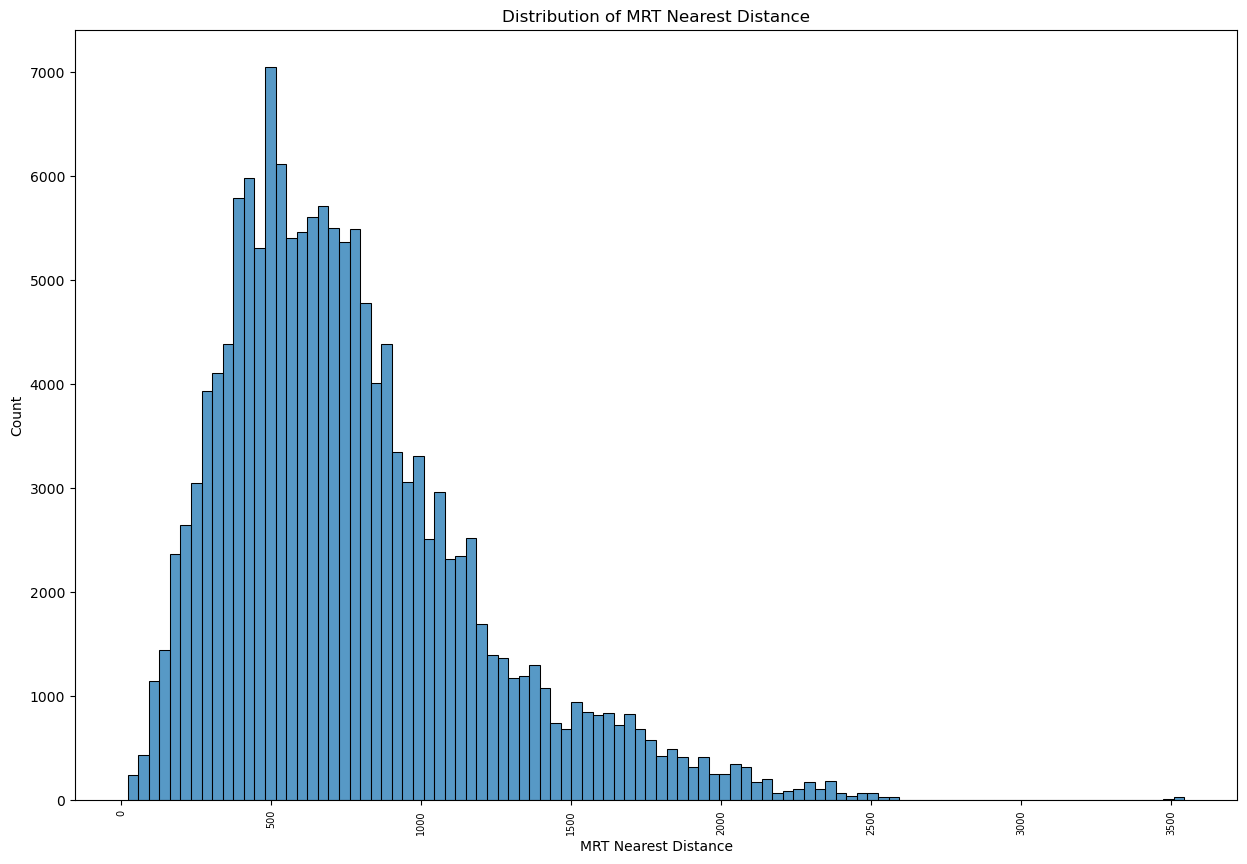

In [61]:
# Distribution of Mrt Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.histplot(data=df_access,x="mrt_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('MRT Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of MRT Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

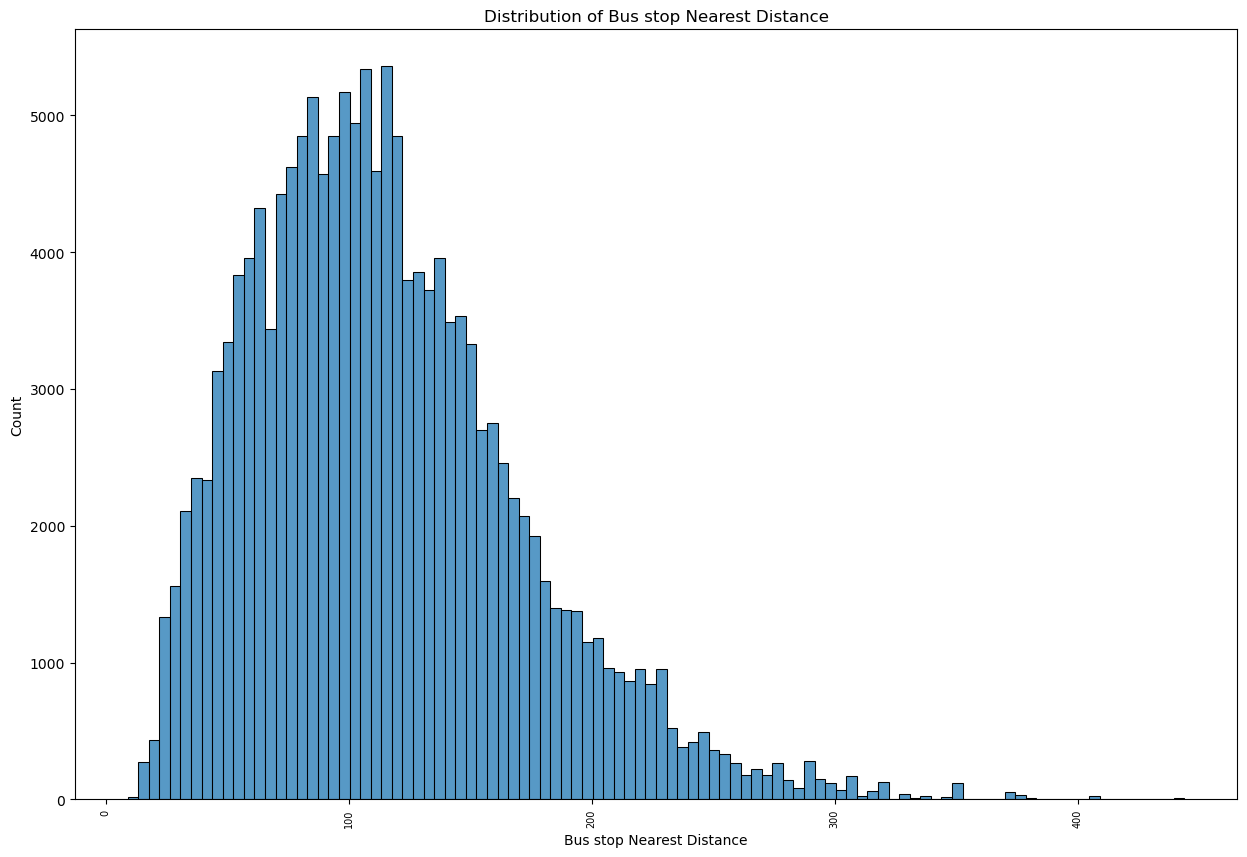

In [62]:
# Distribution of Bus stop Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.histplot(data=df_access,x="bus_stop_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('Bus stop Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of Bus stop Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

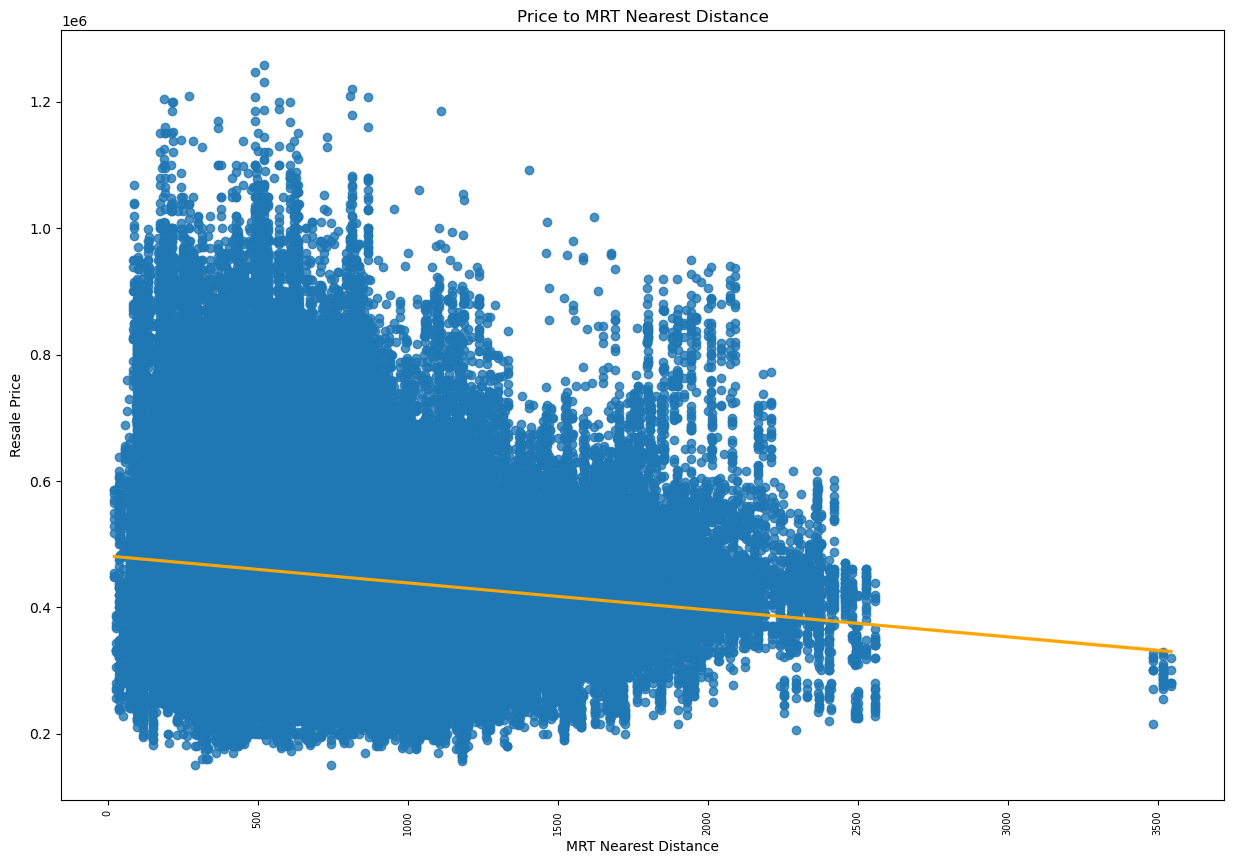

In [64]:
# Re of MRT Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.regplot(data=df_access,x="mrt_nearest_distance", y="resale_price", line_kws = {'color': 'orange'})

# Add labels and titles
plt.xlabel('MRT Nearest Distance')
plt.ylabel('Resale Price')
plt.title("Price to MRT Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

In [65]:
# Locate the postal sector for mall nearest distance >3000m

df_access["postal_sector"] = df["postal_sector"]
df_access[df_access["mrt_nearest_distance"] > 3000]

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_20173/4050977139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_access["postal_sector"] = df["postal_sector"]


resale_price  mrt_nearest_distance  bus_stop_nearest_distance  \
8534        280000.0           3517.814536                  56.113235   
12093       305000.0           3517.814536                  56.113235   
13316       320000.0           3483.769534                  67.559663   
30358       330000.0           3517.814536                  56.113235   
31528       310000.0           3517.814536                  56.113235   
32355       280000.0           3517.814536                  56.113235   
37007       285000.0           3517.814536                  56.113235   
38241       300000.0           3483.769534                  67.559663   
38984       280000.0           3544.504228                  21.737868   
50196       300000.0           3517.814536                  56.113235   
52023       285000.0           3517.814536                  56.113235   
54519       295000.0           3517.814536                  56.113235   
59135       286000.0           3517.814536                  56.113235   
63342       270000.0           3483.769534                  67.559663   
67276       295000.0           3517.814536                  56.113235   
67830       315000.0           3483.769534                  67.559663   
68098       275000.0           3544.504228                  21.737868   
72045       328000.0           3483.769534                  67.559663   
75565       321500.0           3483.769534                  67.559663   
78887       300000.0           3483.769534                  67.559663   
79767       301000.0           3544.504228                  21.737868   
79992       305000.0           3517.814536                  56.113235   
80731       295000.0           3517.814536                  56.113235   
82775       305500.0           3517.814536                  56.113235   
94763       323000.0           3517.814536                  56.113235   
96336       277000.0           3517.814536                  56.113235   
96390       280000.0           3544.504228                  21.737868   
102257      280000.0           3544.504228                  21.737868   
113027      275000.0           3517.814536                  56.113235   
114255      255000.0           3517.814536                  56.113235   
114580      300000.0           3483.769534                  67.559663   
120918      290000.0           3517.814536                  56.113235   
127615      290000.0           3517.814536                  56.113235   
129945      327000.0           3517.814536                  56.113235   
130521      295000.0           3517.814536                  56.113235   
130847      270800.0           3517.814536                  56.113235   
144395      215000.0           3483.769534                  67.559663   
146639      320000.0           3544.504228                  21.737868   

        postal_sector  
8534               50  
12093              50  
13316              50  
30358              50  
31528              50  
32355              50  
37007              50  
38241              50  
38984              50  
50196              50  
52023              50  
54519              50  
59135              50  
63342              50  
67276              50  
67830              50  
68098              50  
72045              50  
75565              50  
78887              50  
79767              50  
79992              50  
80731              50  
82775              50  
94763              50  
96336              50  
96390              50  
102257             50  
113027             50  
114255             50  
114580             50  
120918             50  
127615             50  
129945             50  
130521             50  
130847             50  
144395             50  
146639             50

In [72]:
df_access.groupby("mrt_name")["resale_price"].median().sort_values()

mrt_name
MacPherson         280000.0
Mattar             283000.0
Changi Airport     295000.0
Tai Seng           311000.0
Woodlands North    318000.0
Canberra           320000.0
Bedok North        330000.0
Marsiling          340000.0
Commonwealth       341000.0
Hillview           342000.0
Braddell           343000.0
Yio Chu Kang       345000.0
Geylang Bahru      346500.0
Yishun             348000.0
Dakota             349000.0
Cashew             350000.0
Bedok Reservoir    358000.0
Bukit Gombak       360000.0
Bedok              370000.0
Lakeside           370000.0
Aljunied           375000.0
Ang Mo Kio         378000.0
Chinese Garden     380000.0
Bukit Batok        380000.0
one-north          386500.0
Khatib             388000.0
Rochor             388000.0
Tanah Merah        388888.0
Lavender           390000.0
HarbourFront       390000.0
Ubi                390000.0
Woodleigh          393800.0
Choa Chu Kang      395000.0
Admiralty          400000.0
Potong Pasir       400544.0
Clementi   

In [76]:
df_access.groupby("mrt_name")["mrt_name"].count().sort_values()

mrt_name
Bugis                 9
Novena               10
Bendemeer            11
Tan Kah Kee          12
Bras Basah           22
Botanic Gardens      23
Woodleigh            31
Changi Airport       38
Nicoll Highway       42
Labrador Park        47
Clarke Quay          48
Bencoolen            62
Hillview             77
Bartley              84
Rochor               93
Farrer Road          96
Little India         98
one-north           110
Caldecott           177
Jalan Besar         178
Upper Changi        185
Dakota              189
Chinatown           198
Paya Lebar          202
Tai Seng            221
Beauty World        238
Lavender            267
Kallang             380
Lorong Chuan        390
Holland Village     409
Tanjong Pagar       410
Woodlands North     433
Dover               440
Farrer Park         484
Mountbatten         487
Aljunied            507
Canberra            512
Outram Park         513
HarbourFront        546
Marymount           565
MacPherson          591
Ubi    

In [77]:
df_mrt_bp = df_access[df_access["mrt_name"] == "Bukit Panjang"]

resale_price       mrt_name  mrt_nearest_distance  \
14         345000.00  Bukit Panjang           1630.950101   
15         288888.00  Bukit Panjang            772.043309   
76         560000.00  Bukit Panjang             96.454371   
101        415000.00  Bukit Panjang            979.698448   
140        385000.00  Bukit Panjang           1188.786103   
148        550000.00  Bukit Panjang            932.433774   
222        470000.00  Bukit Panjang            886.041333   
267        562000.00  Bukit Panjang            964.763401   
292        510000.00  Bukit Panjang            753.167993   
295        580000.00  Bukit Panjang            620.739988   
346        353000.00  Bukit Panjang            654.139670   
399        440000.00  Bukit Panjang            587.893575   
433        411000.00  Bukit Panjang           1087.763725   
435        515000.00  Bukit Panjang            891.344448   
450        328000.00  Bukit Panjang            826.503901   
482        352000.00  Bukit Panjang            621.162994   
502        360000.00  Bukit Panjang            845.237280   
511        453000.00  Bukit Panjang            781.280999   
558        302888.00  Bukit Panjang           1498.334759   
572        420000.00  Bukit Panjang            488.317820   
581        333000.00  Bukit Panjang           1034.672422   
600        605000.00  Bukit Panjang            979.698448   
611        354000.00  Bukit Panjang            561.796112   
615        395000.00  Bukit Panjang           1319.422474   
653        463000.00  Bukit Panjang            703.336250   
681        405000.00  Bukit Panjang           1162.259168   
752        510000.00  Bukit Panjang            421.705439   
762        383888.00  Bukit Panjang            513.837848   
786        435000.00  Bukit Panjang           1256.437900   
796        420000.00  Bukit Panjang           1522.547365   
839        452000.00  Bukit Panjang            441.009498   
877        380000.00  Bukit Panjang           1681.332521   
890        360000.00  Bukit Panjang           1369.656125   
897        480000.00  Bukit Panjang            620.739988   
917        425000.00  Bukit Panjang            328.838021   
944        473000.00  Bukit Panjang            415.670018   
952        626888.00  Bukit Panjang            199.054476   
977        330000.00  Bukit Panjang           1119.999210   
984        513000.00  Bukit Panjang           1637.812866   
1008       365888.00  Bukit Panjang            953.209352   
1068       441000.00  Bukit Panjang           1272.032060   
1092       425000.00  Bukit Panjang            778.052971   
1101       440000.00  Bukit Panjang            940.715297   
1136       355000.00  Bukit Panjang            774.278526   
1211       450000.00  Bukit Panjang           1542.810422   
1238       620000.00  Bukit Panjang            199.054476   
1250       423000.00  Bukit Panjang           1522.547365   
1259       300888.00  Bukit Panjang           1574.290665   
1267       455000.00  Bukit Panjang            493.462498   
1278       440000.00  Bukit Panjang           1365.838154   
1288       299000.00  Bukit Panjang            673.268561   
1297       465000.00  Bukit Panjang            576.749008   
1298       273000.00  Bukit Panjang           1003.871821   
1355       613000.00  Bukit Panjang            488.317820   
1357       507000.00  Bukit Panjang            621.162994   
1389       350000.00  Bukit Panjang           1284.910685   
1414       462888.00  Bukit Panjang            565.212178   
1431       335000.00  Bukit Panjang            587.245555   
1456       525000.00  Bukit Panjang            760.813886   
1489       326000.00  Bukit Panjang            689.248089   
1500       455000.00  Bukit Panjang           1324.016941   
1544       762888.00  Bukit Panjang            133.043735   
1555       440000.00  Bukit Panjang            673.503613   
1607       315000.00  Bukit Panjang           1020.662583   
1632       595000.00  Bukit Panjang        

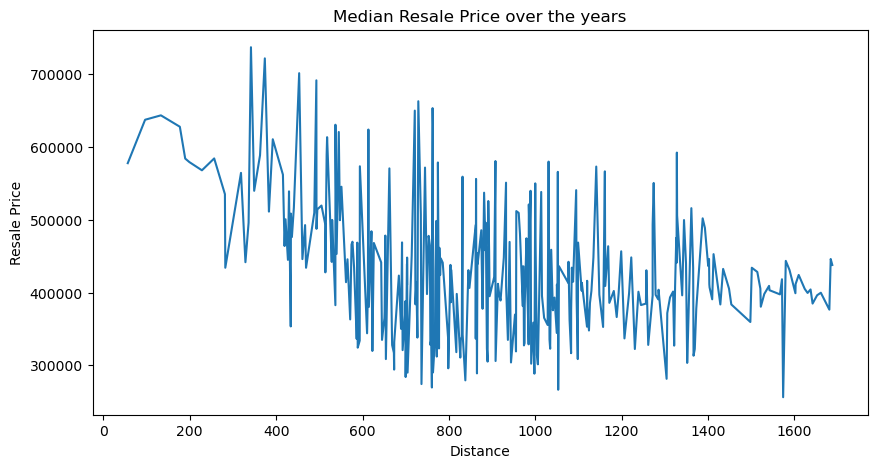

In [80]:
# Visualize the resale price against distance in bukit panjang
# Set the figure size
plt.figure(figsize=(10, 5))  

# Create the line plot
df_mrt_bp = df_access[df_access["mrt_name"] == "Bukit Panjang"]
sns.lineplot(data=df_mrt_bp, x='mrt_nearest_distance', y="resale_price", errorbar=None)

# Set y-axis limits to start at 0
#max_y_value = resale_median['resale_price'].max() + 100000
#plt.ylim(0, max_y_value)

# Add labels and titles
plt.xlabel('Distance')
plt.ylabel('Resale Price')
plt.title('Median Resale Price over the years')

# Show all x-axis labels without rotation
#plt.xticks(resale_median['tranc_year'], rotation=0)

# Show the plot
plt.show()

### Draw one for every district/town

in every region, taking 1 mrt example, the further the distance, the higher the price

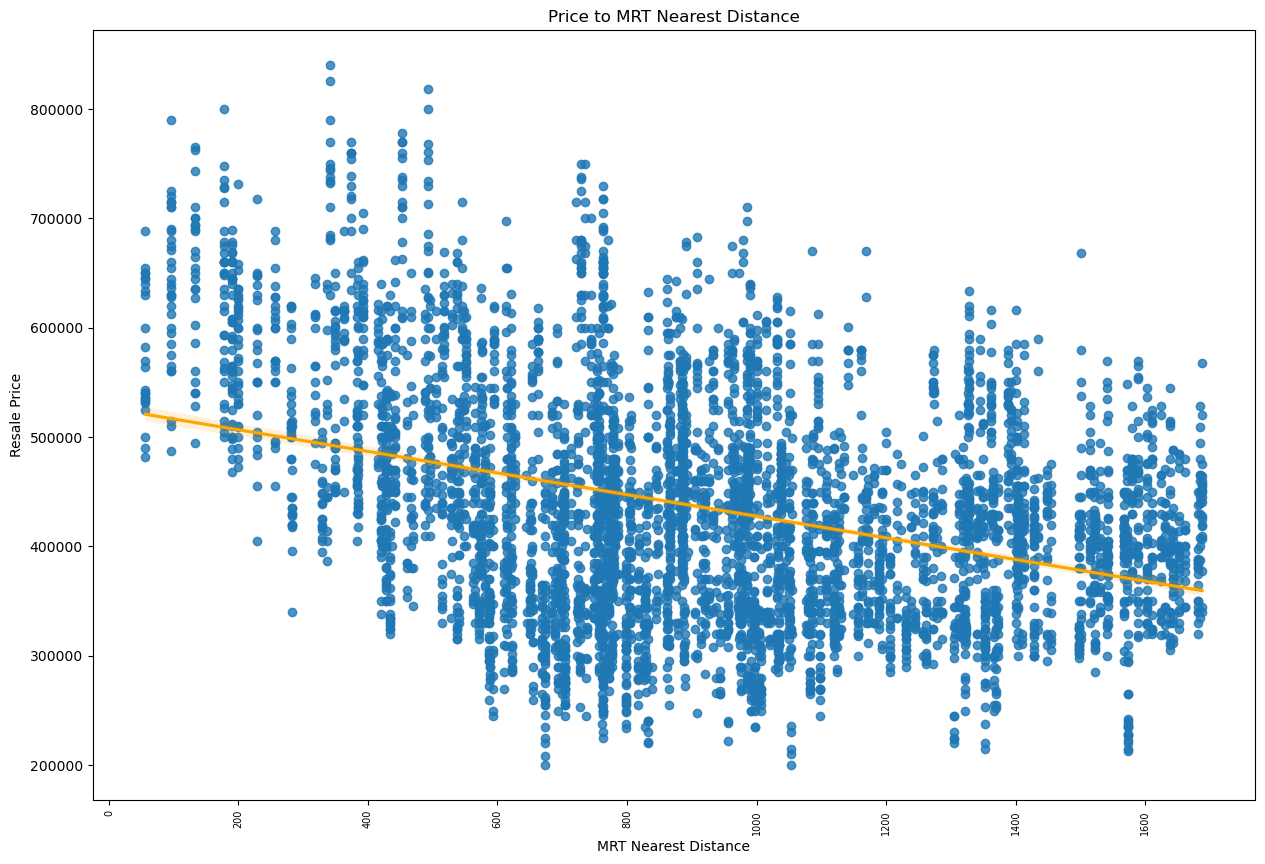

In [81]:
# Re of MRT Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram

df_mrt_bp = df_access[df_access["mrt_name"] == "Bukit Panjang"]
sns.regplot(data=df_mrt_bp, x='mrt_nearest_distance', y="resale_price", line_kws = {'color': 'orange'})



# Add labels and titles
plt.xlabel('MRT Nearest Distance')
plt.ylabel('Resale Price')
plt.title("Price to MRT Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

MRT nearest distance follows a fairly normal distribution, slightly positively skewed. 

Generally, flats near MRT station cost more, and the price decreases as it gets further away from the MRT station.  

MRT nearest distance > 3000m are all located in postal sector = 50, which is in Changi. This indicates that flats in Changi area are far from the MRT station and may not be easily accessible via MRT. If buyers prioritise having nearby transportation, they should avoid the Changi area.



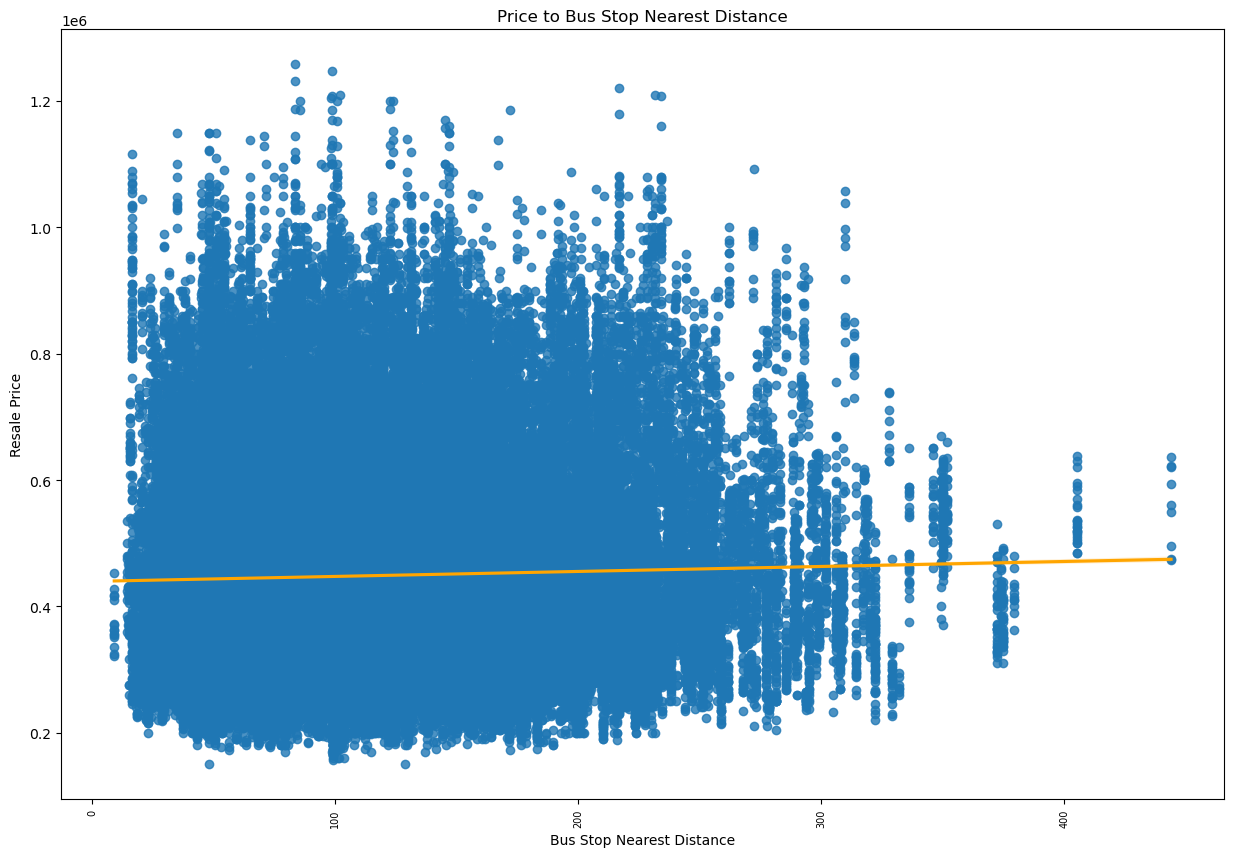

In [66]:
# Re of bus stop Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.regplot(data=df_access,x="bus_stop_nearest_distance", y="resale_price", line_kws = {'color': 'orange'})

# Add labels and titles
plt.xlabel('Bus Stop Nearest Distance')
plt.ylabel('Resale Price')
plt.title("Price to Bus Stop Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

In [ ]:
sns.lineplot(data=df_access, x='mrt_nearest_distance', y='resale_price');

# scatterplot


#plot for no of bus stop over the years.

### 5. Nearby Primary Schools 

Having a Primary School nearby could be a great convenience for parents as their young children have the option to walk home after school instead of having alternative transport arrangements.

Distances to the nearest primary school from the flats range between 0.05km to 3.31km, with a mean of 0.40km

In [84]:
df_sch = df[['resale_price','pri_sch_nearest_distance']]

In [85]:
df_sch.corr()

resale_price  pri_sch_nearest_distance
resale_price                  1.000000                 -0.010867
pri_sch_nearest_distance     -0.010867                  1.000000

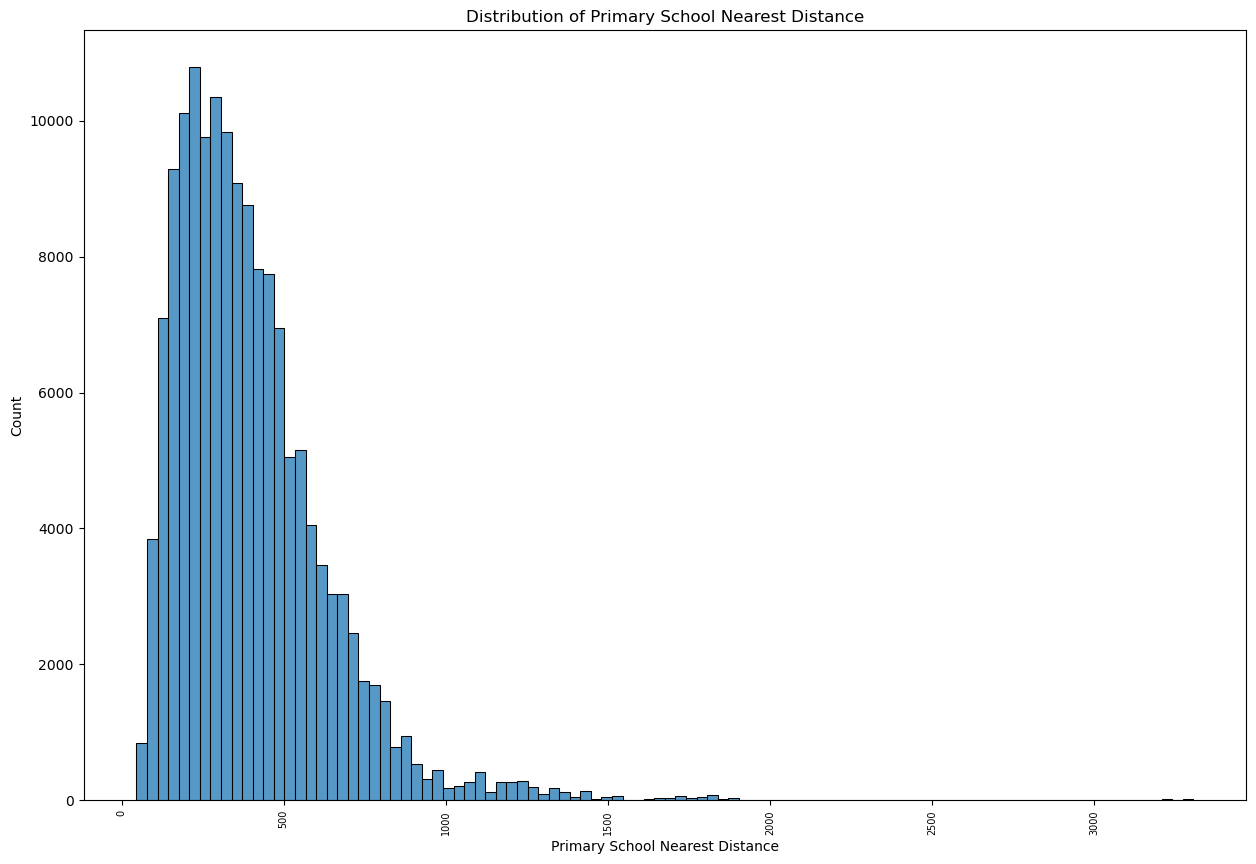

In [83]:
# Distribution of Primary School Nearest Distance

# Set the figure size
plt.figure(figsize=(15,10))

# Create the histogram
sns.histplot(data=df_sch,x="pri_sch_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('Primary School Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of Primary School Nearest Distance")

# Set the x-axis font size
plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

In [86]:
# Define the conditions and labels
conditions = [
    (df_sch['pri_sch_nearest_distance'] <= 1000),
    (df_sch['pri_sch_nearest_distance'] > 1000) & (df_sch['pri_sch_nearest_distance'] <= 2000),
    (df_sch['pri_sch_nearest_distance'] > 2000)
]

labels = ['<=1000', 'between 1000 and 2000', '>2000']

# Use numpy's select function to create the new column based on conditions and labels
df_sch['pri_sch_distance_cat'] = np.select(conditions, labels, default='Unknown')

# Print the updated DataFrame
df_sch.head()

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_20173/355999197.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sch['pri_sch_distance_cat'] = np.select(conditions, labels, default='Unknown')


resale_price  pri_sch_nearest_distance   pri_sch_distance_cat
0      680000.0               1138.633422  between 1000 and 2000
1      665000.0                415.607357                 <=1000
2      838000.0                498.849039                 <=1000
3      550000.0                389.515528                 <=1000
4      298000.0                401.200584                 <=1000

In [87]:
X_trial7 = df_sch
X_trial7 = pd.get_dummies(data=df_sch, columns=['pri_sch_distance_cat'])

In [88]:
X_trial7.corr()

resale_price  \
resale_price                                    1.000000   
pri_sch_nearest_distance                       -0.010867   
pri_sch_distance_cat_<=1000                     0.008917   
pri_sch_distance_cat_>2000                     -0.017224   
pri_sch_distance_cat_between 1000 and 2000     -0.007075   

                                            pri_sch_nearest_distance  \
resale_price                                               -0.010867   
pri_sch_nearest_distance                                    1.000000   
pri_sch_distance_cat_<=1000                                -0.567309   
pri_sch_distance_cat_>2000                                  0.195021   
pri_sch_distance_cat_between 1000 and 2000                  0.549142   

                                            pri_sch_distance_cat_<=1000  \
resale_price                                                   0.008917   
pri_sch_nearest_distance                                      -0.567309   
pri_sch_distance_cat_<=1000                                    1.000000   
pri_sch_distance_cat_>2000                                    -0.106948   
pri_sch_distance_cat_between 1000 and 2000                    -0.994010   

                                            pri_sch_distance_cat_>2000  \
resale_price                                                 -0.017224   
pri_sch_nearest_distance                                      0.195021   
pri_sch_distance_cat_<=1000                                  -0.106948   
pri_sch_distance_cat_>2000                                    1.000000   
pri_sch_distance_cat_between 1000 and 2000                   -0.002359   

                                            pri_sch_distance_cat_between 1000 and 2000  
resale_price                                                                 -0.007075  
pri_sch_nearest_distance                                                      0.549142  
pri_sch_distance_cat_<=1000                                                  -0.994010  
pri_sch_distance_cat_>2000                                                   -0.002359  
pri_sch_distance_cat_between 1000 and 2000                                    1.000000